In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
from tools_ryu import mytool
from tools_ryu.cross_sectional_v2 import CrossSectional

In [ ]:
cmktcap = pd.read_pickle("Data/cmktcap_data_final.pickle")
cmktcap_reduced = pd.read_pickle("Data/cmktcap_data_reduced.pickle")
binance = pd.read_pickle("Data/binance_data_pp.pickle")

In [ ]:
# Initialize the Data
c_mkt = CrossSectional(cmktcap,"coinmarketcap")
c_mkt_reduced = CrossSectional(cmktcap_reduced, "coinmarketcap")
b_mkt = CrossSectional(binance, "binance")

In [ ]:
#                  mktcap, volume
group_value = {"M1":[None,None],
               "M2":[1_000_000, None],
               "M3":[1_000_000,1_000_000],
               "M4":[1_000_000,10_000_000]}

In [ ]:
# 코인 마켓 인덱스 생성
market_index_cmktcap = {}
coin_num_cmktcap = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt.make_market_index(value_lst[0],value_lst[1])
    market_index_cmktcap[key] = rtn
    coin_num_cmktcap[key] = num

In [ ]:
# 코인 마켓켑 인덱스 (바이낸스와 컬럼 일치) 생성
market_index_cmktcap_reduced = {}
coin_num_cmktcap_reduced = {}

for key, value_lst in tqdm(group_value.items()):
    rtn, num = c_mkt_reduced.make_market_index(value_lst[0],value_lst[1])
    market_index_cmktcap_reduced[key] = rtn
    coin_num_cmktcap_reduced[key] = num

In [ ]:
# 바이낸스 인덱스 생성
market_index_binance = {}
coin_num_binance = {}

for key, value_lst in tqdm(group_value.items()):
    rtn,num = b_mkt.make_market_index(value_lst[0],value_lst[1])
    market_index_binance[key] = rtn
    coin_num_binance[key] = num

In [ ]:
mytool.draw_return_result(market_index_cmktcap, one_plot=True, start_date="2013-12-27")

In [ ]:
mytool.print_statistics(market_index_cmktcap, None, start_date="2013-12-27")

In [ ]:
mytool.draw_return_result(market_index_cmktcap_reduced, one_plot=True, start_date="2013-12-27")

In [ ]:
mytool.print_statistics(market_index_cmktcap_reduced, None, start_date="2013-12-27")

In [ ]:
mytool.draw_return_result(market_index_binance, one_plot=True, start_date="2013-12-27")

In [ ]:
mytool.print_statistics(market_index_binance, None, start_date="2013-12-27")

In [ ]:
#coin_num_cmktcap, coin_num_cmktcap_reduced, coin_num_binance
mytool.draw_coin_count(coin_num_cmktcap)

In [ ]:
mytool.draw_coin_count(coin_num_cmktcap_reduced)

In [ ]:
mytool.draw_coin_count(coin_num_binance)

Value Weighted 전략구현

In [32]:
# 코인마켓켑
momentum_cmktcap = {}
momentum_num_cmktcap = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt.weekly_momentum_value_weighted(5,"SUN", 20, value_lst[0],value_lst[1])
    momentum_cmktcap[key] = rtn
    momentum_num_cmktcap[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

100%|██████████| 5/5 [00:06<00:00,  1.20s/it]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


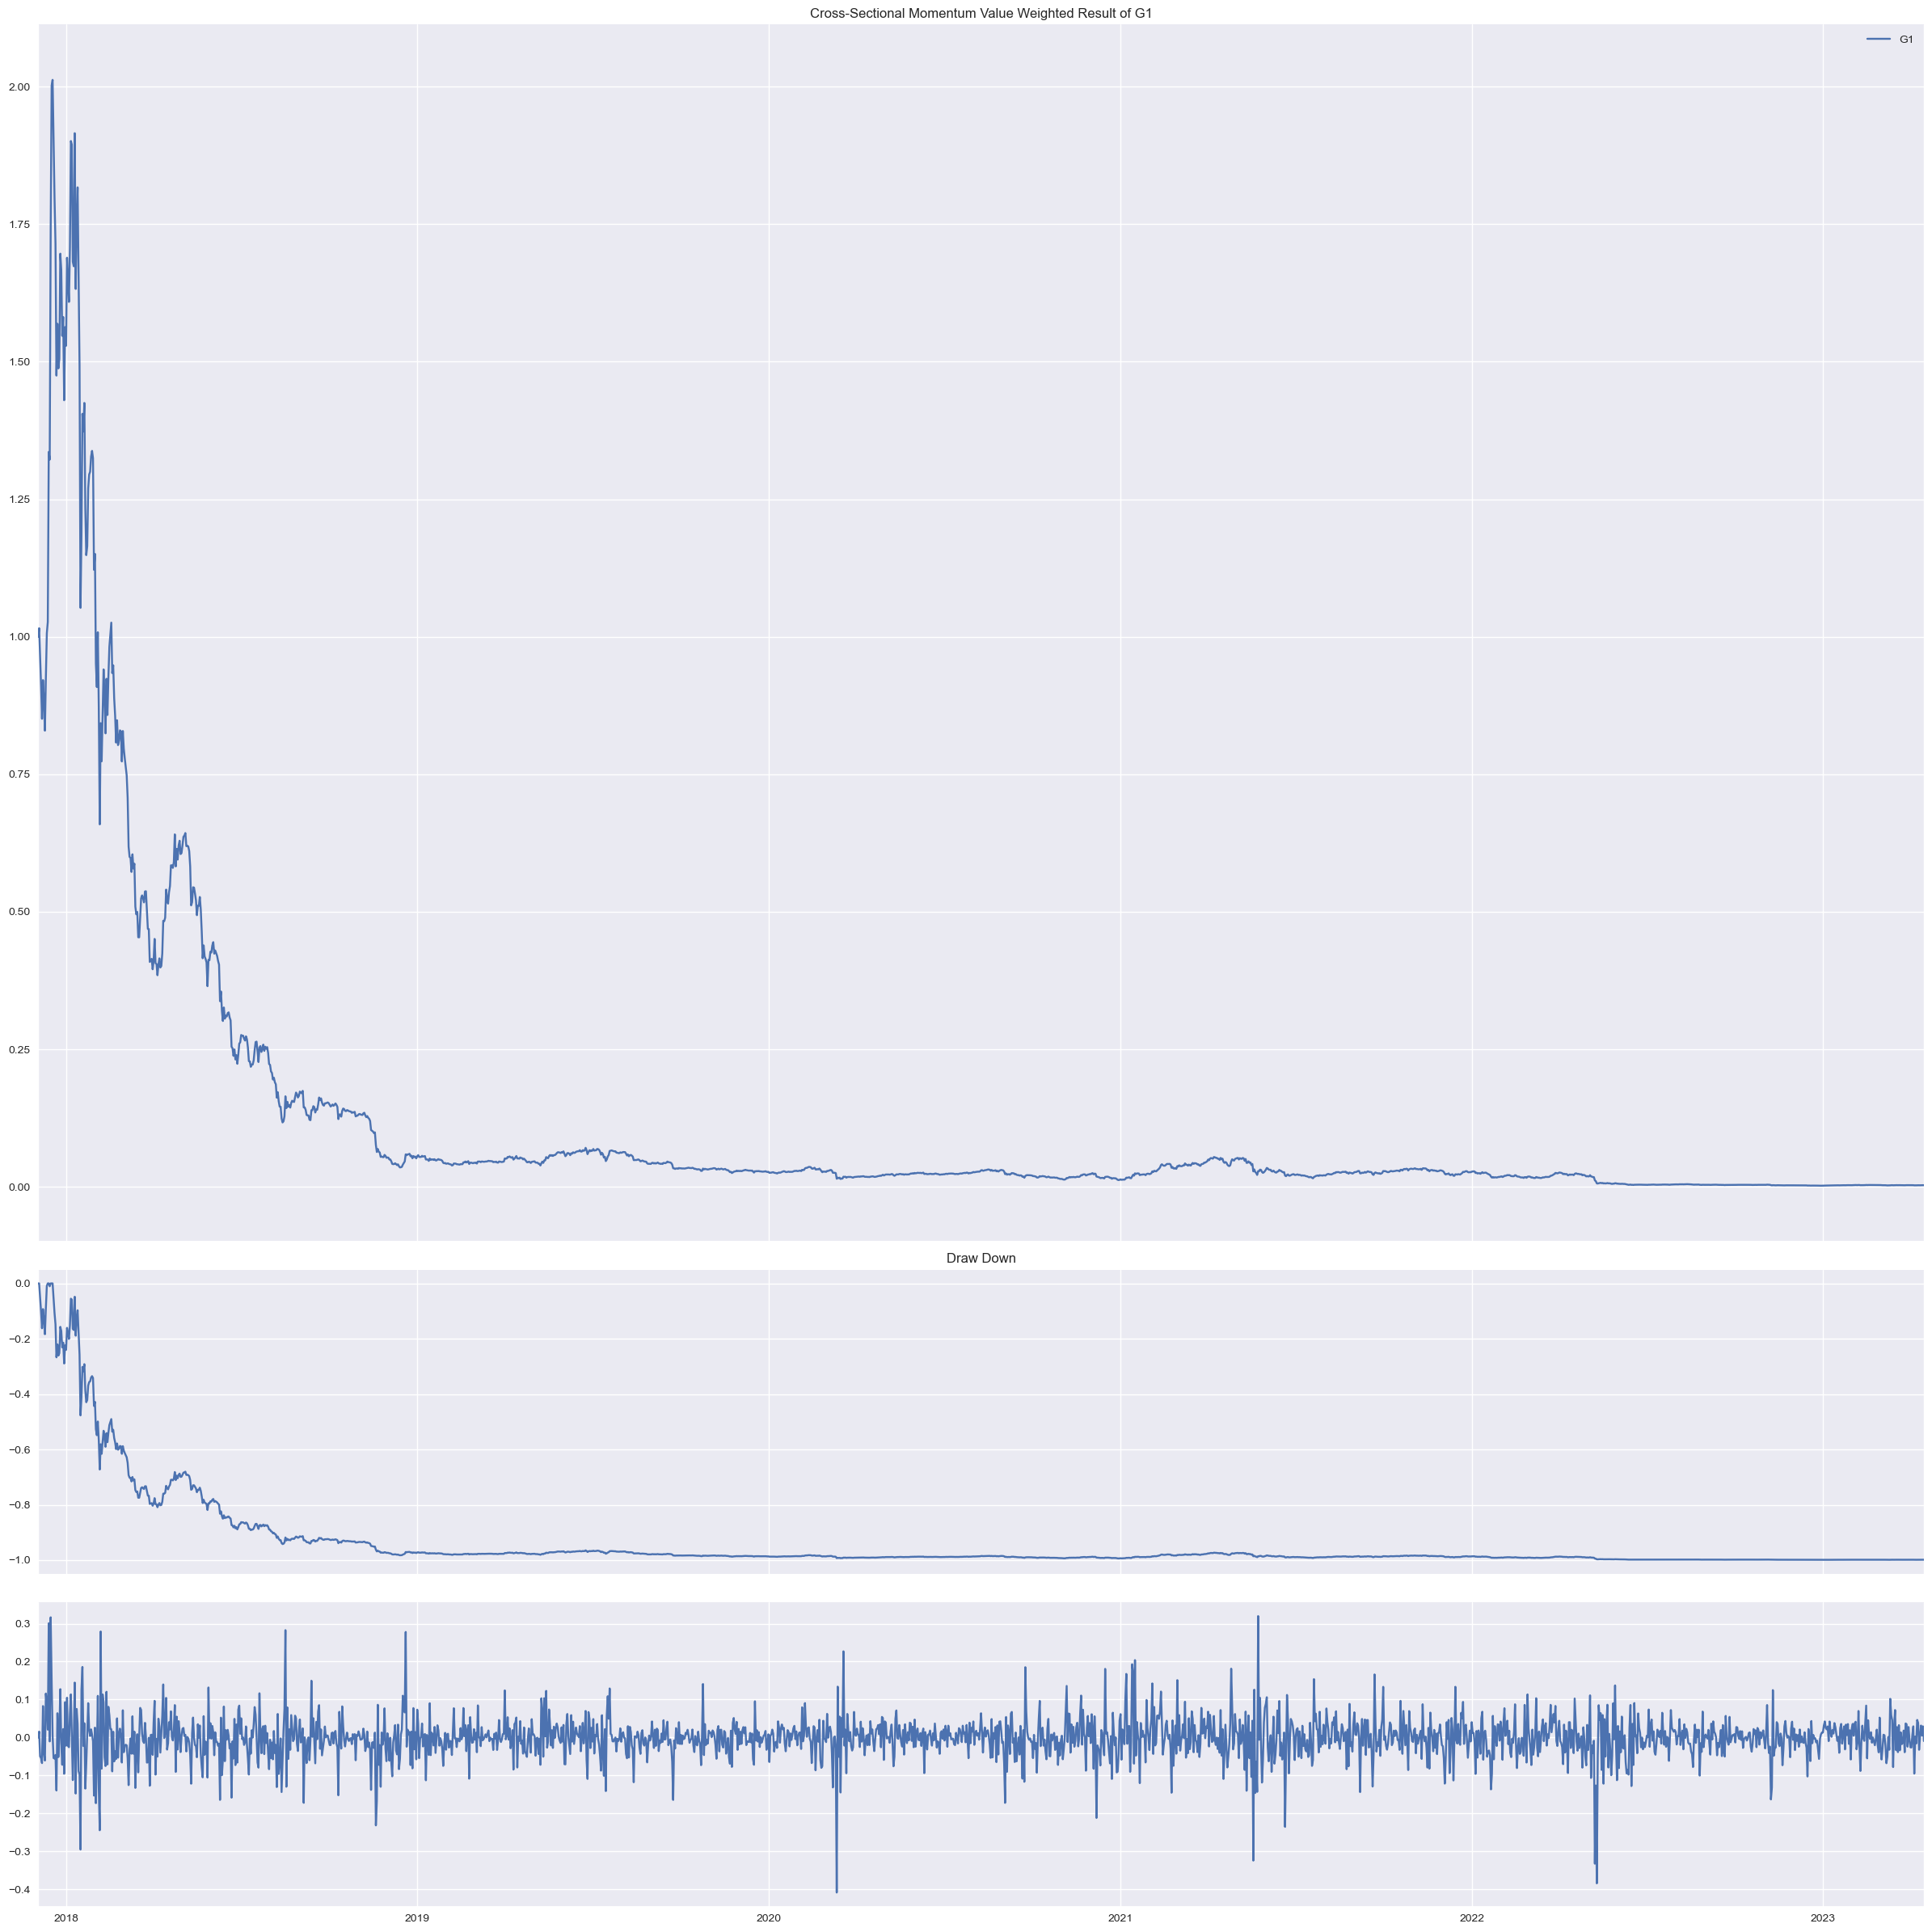

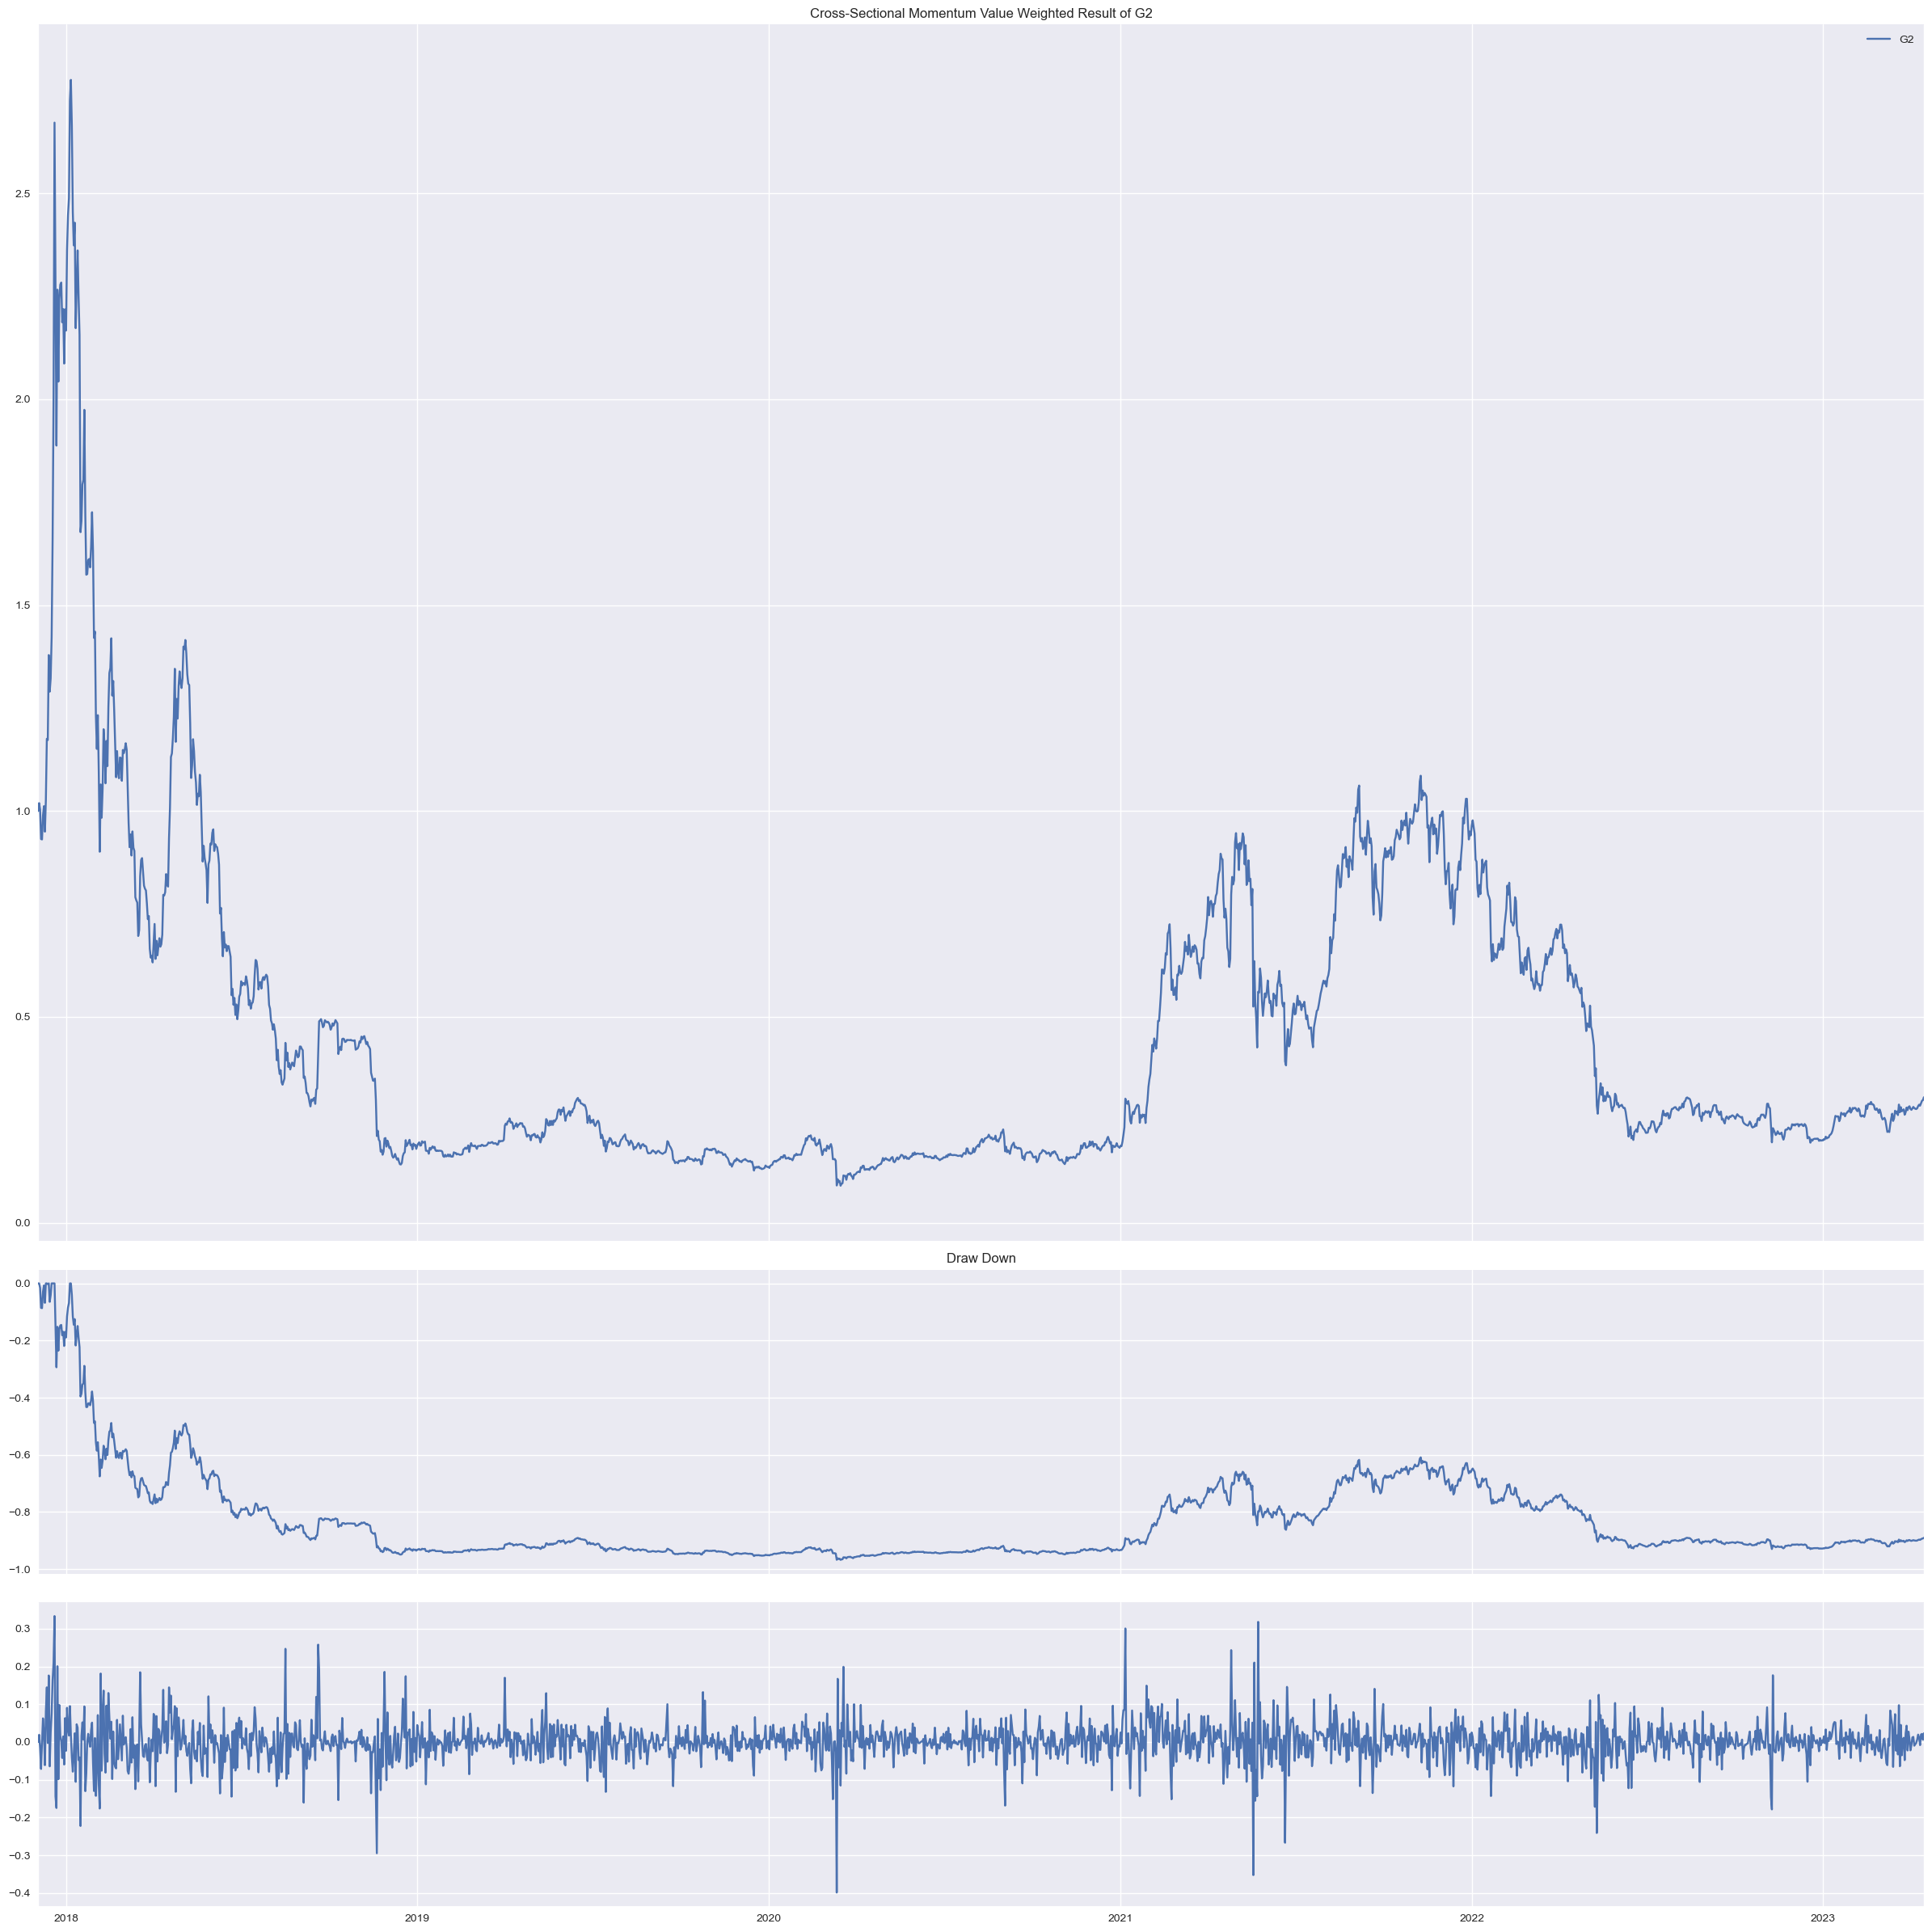

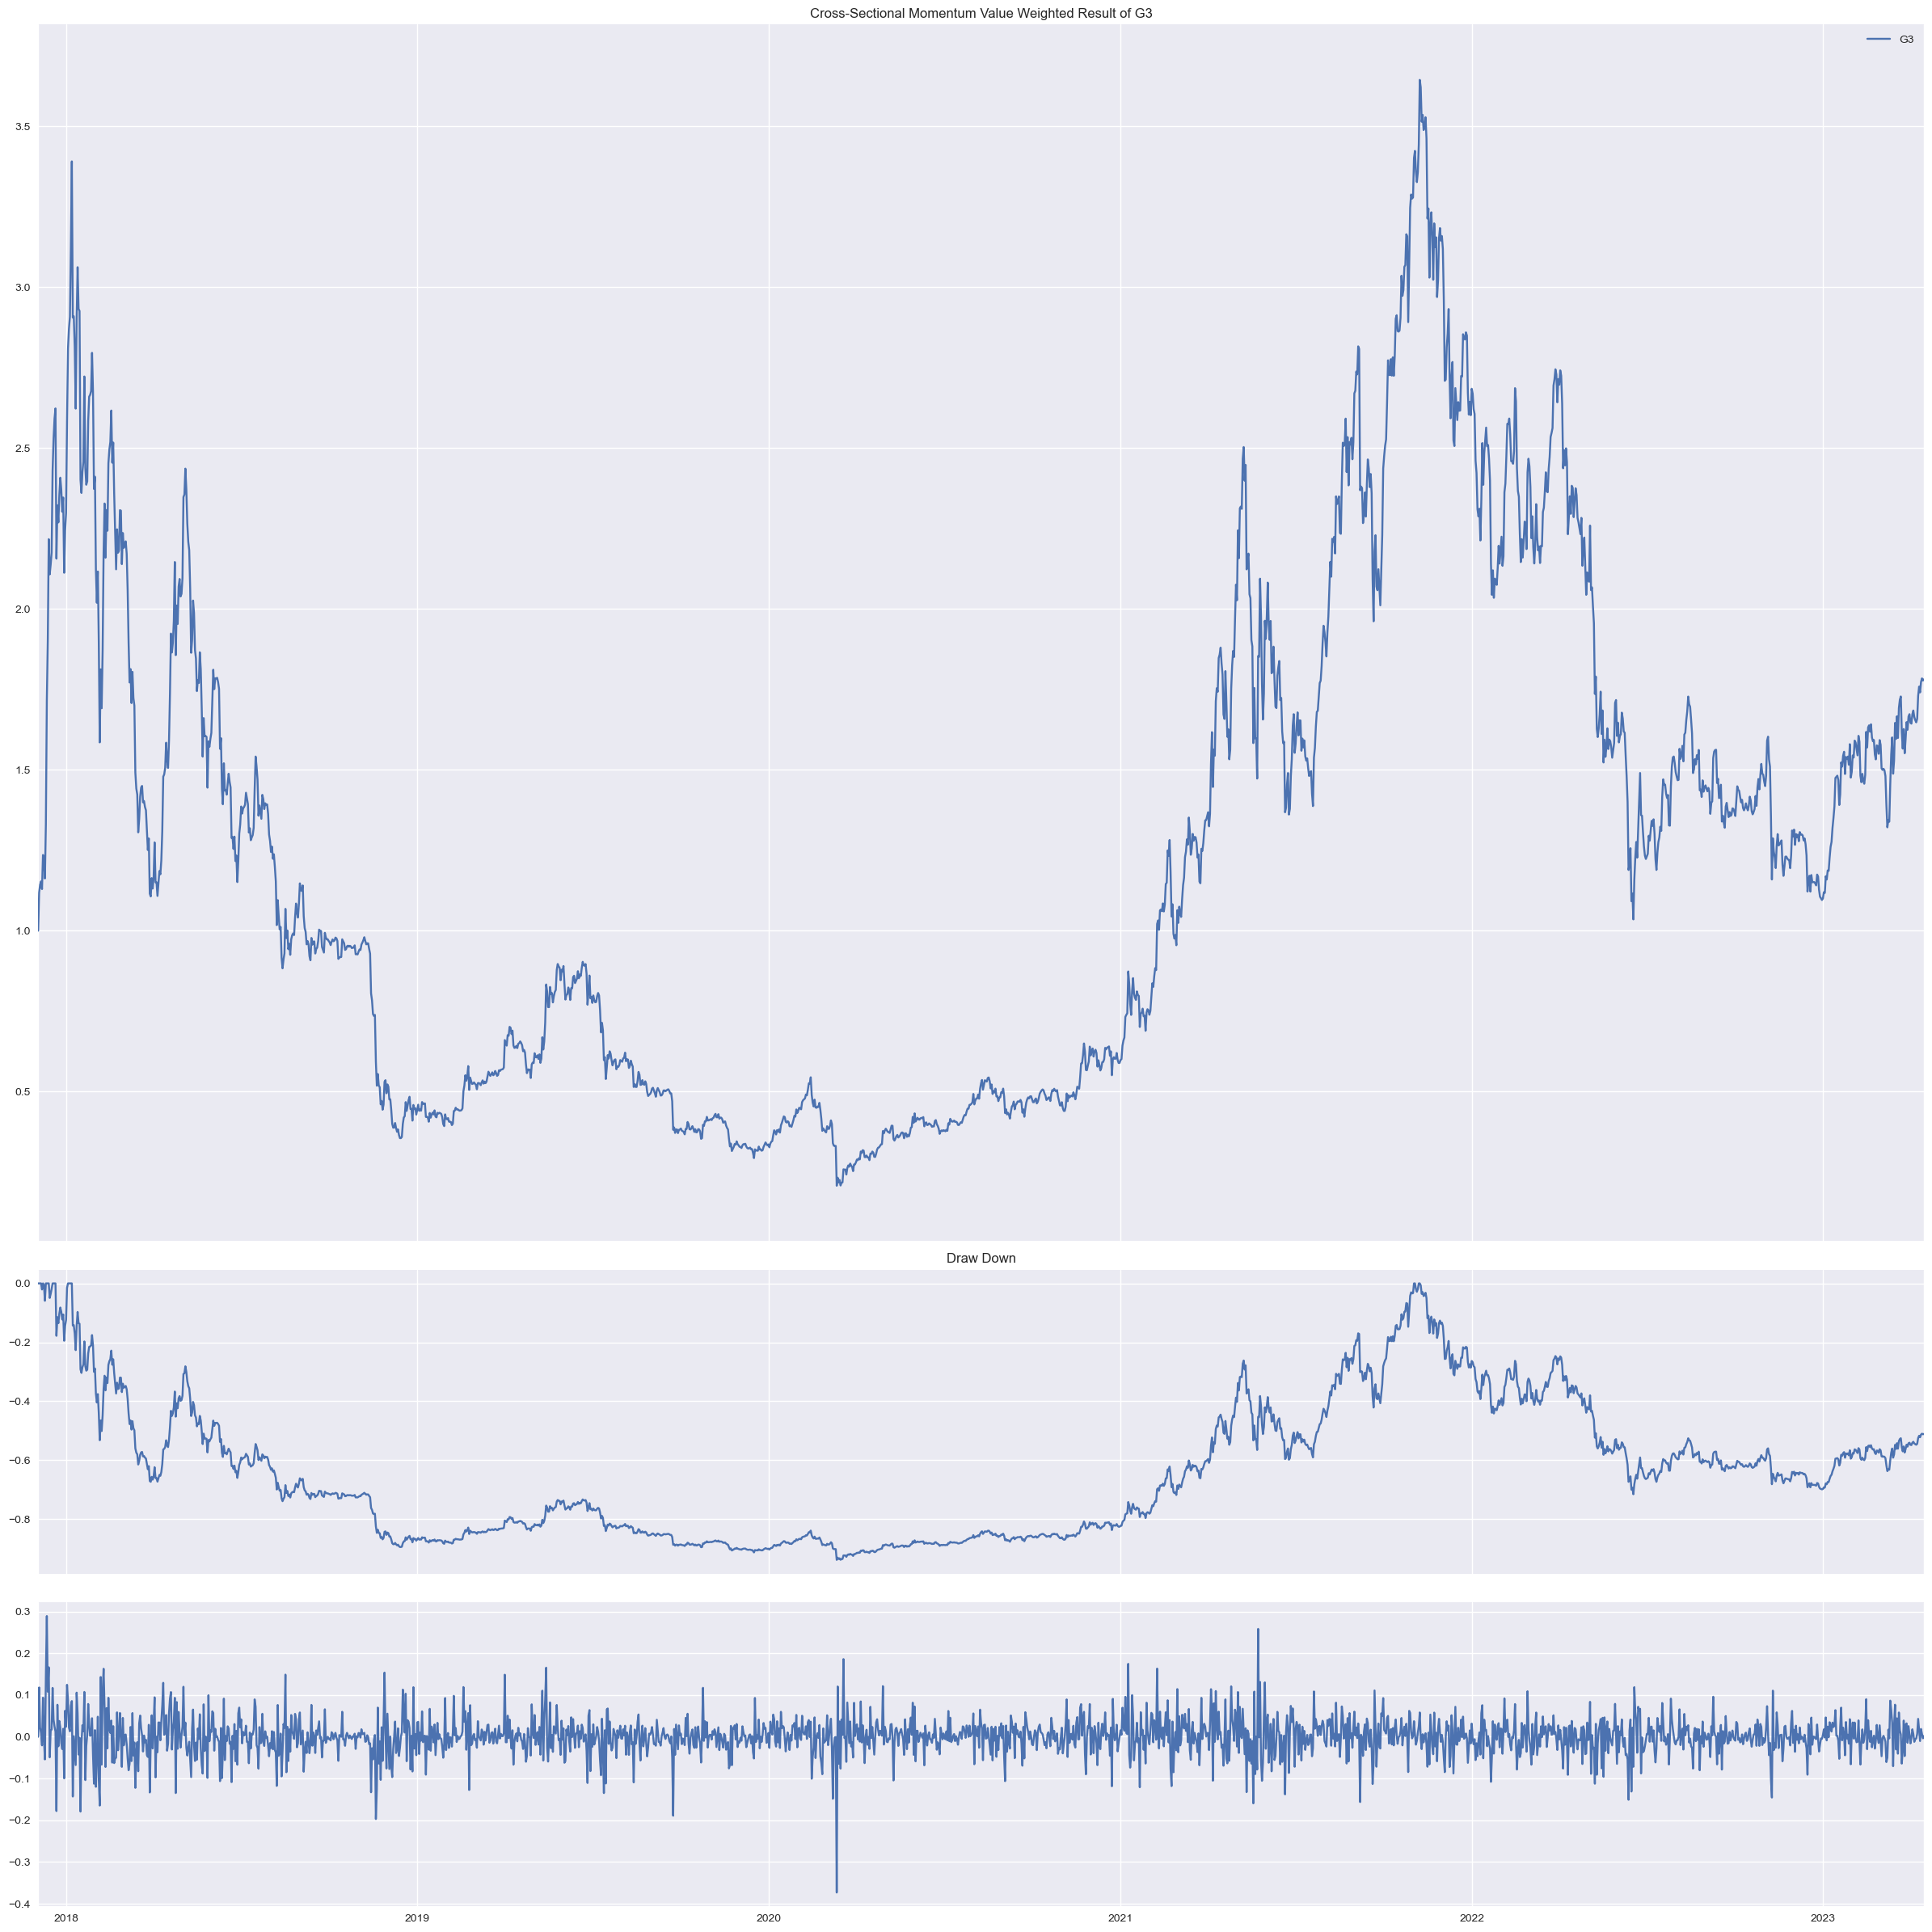

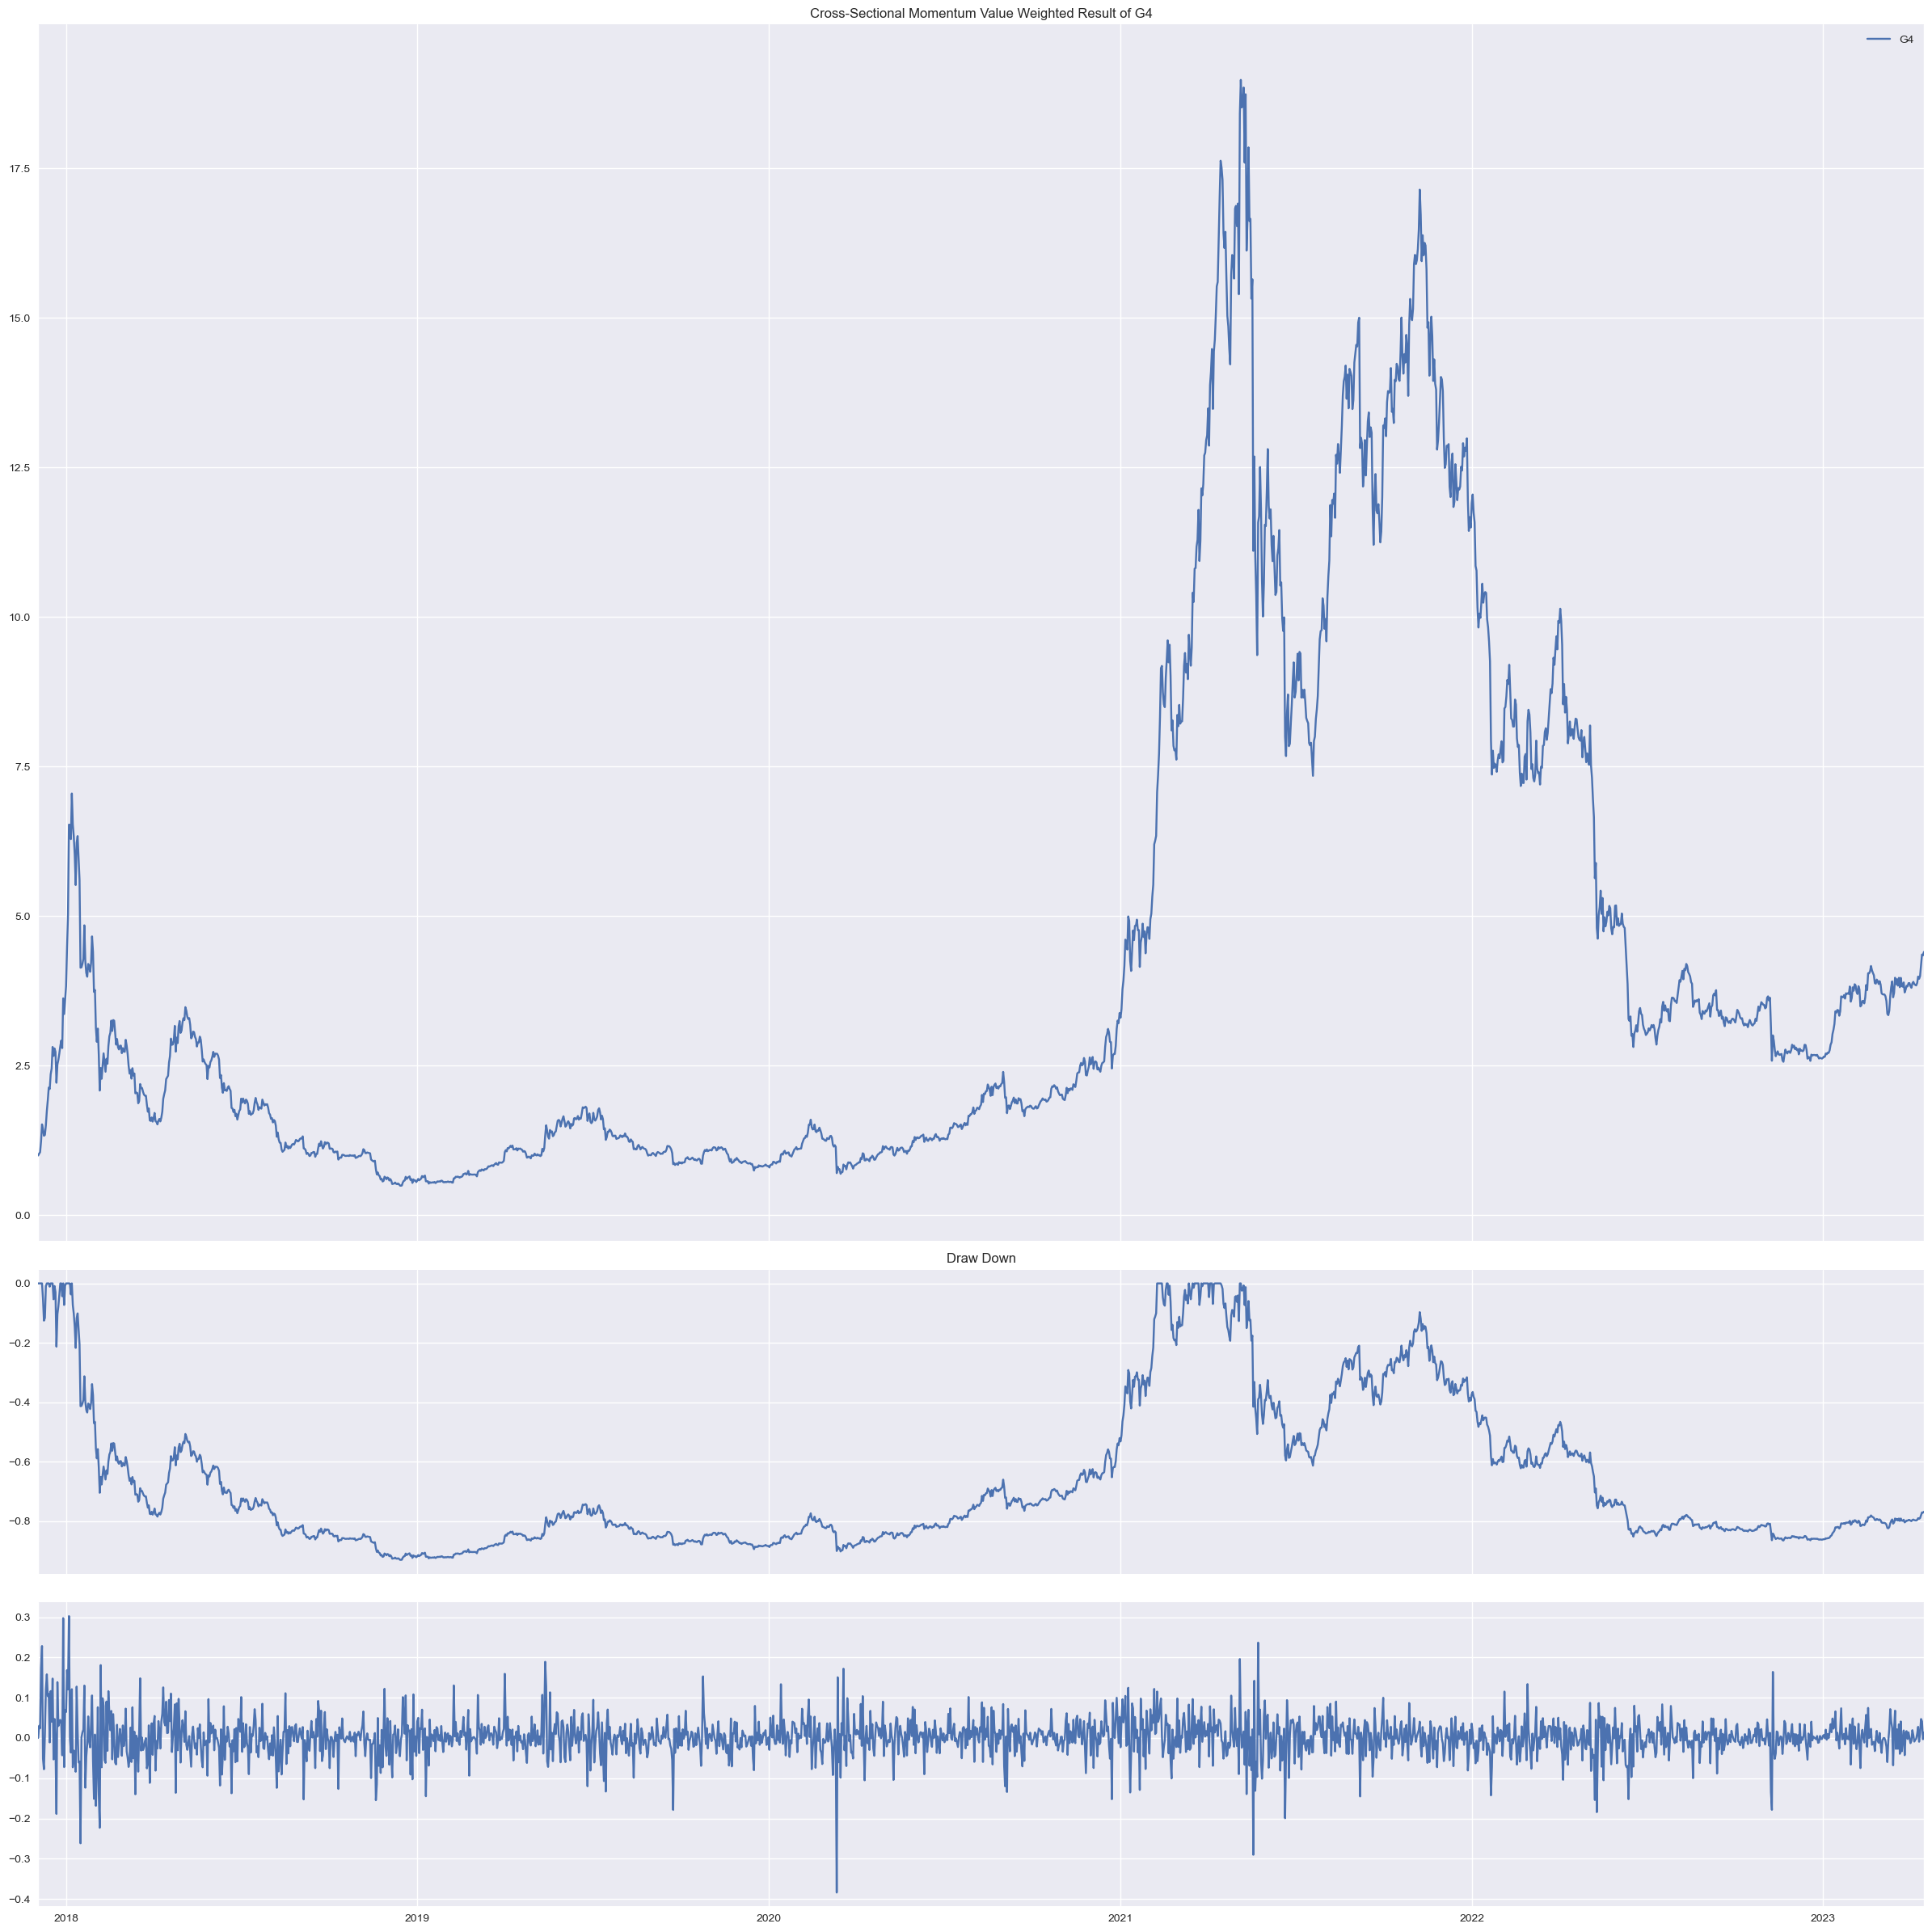

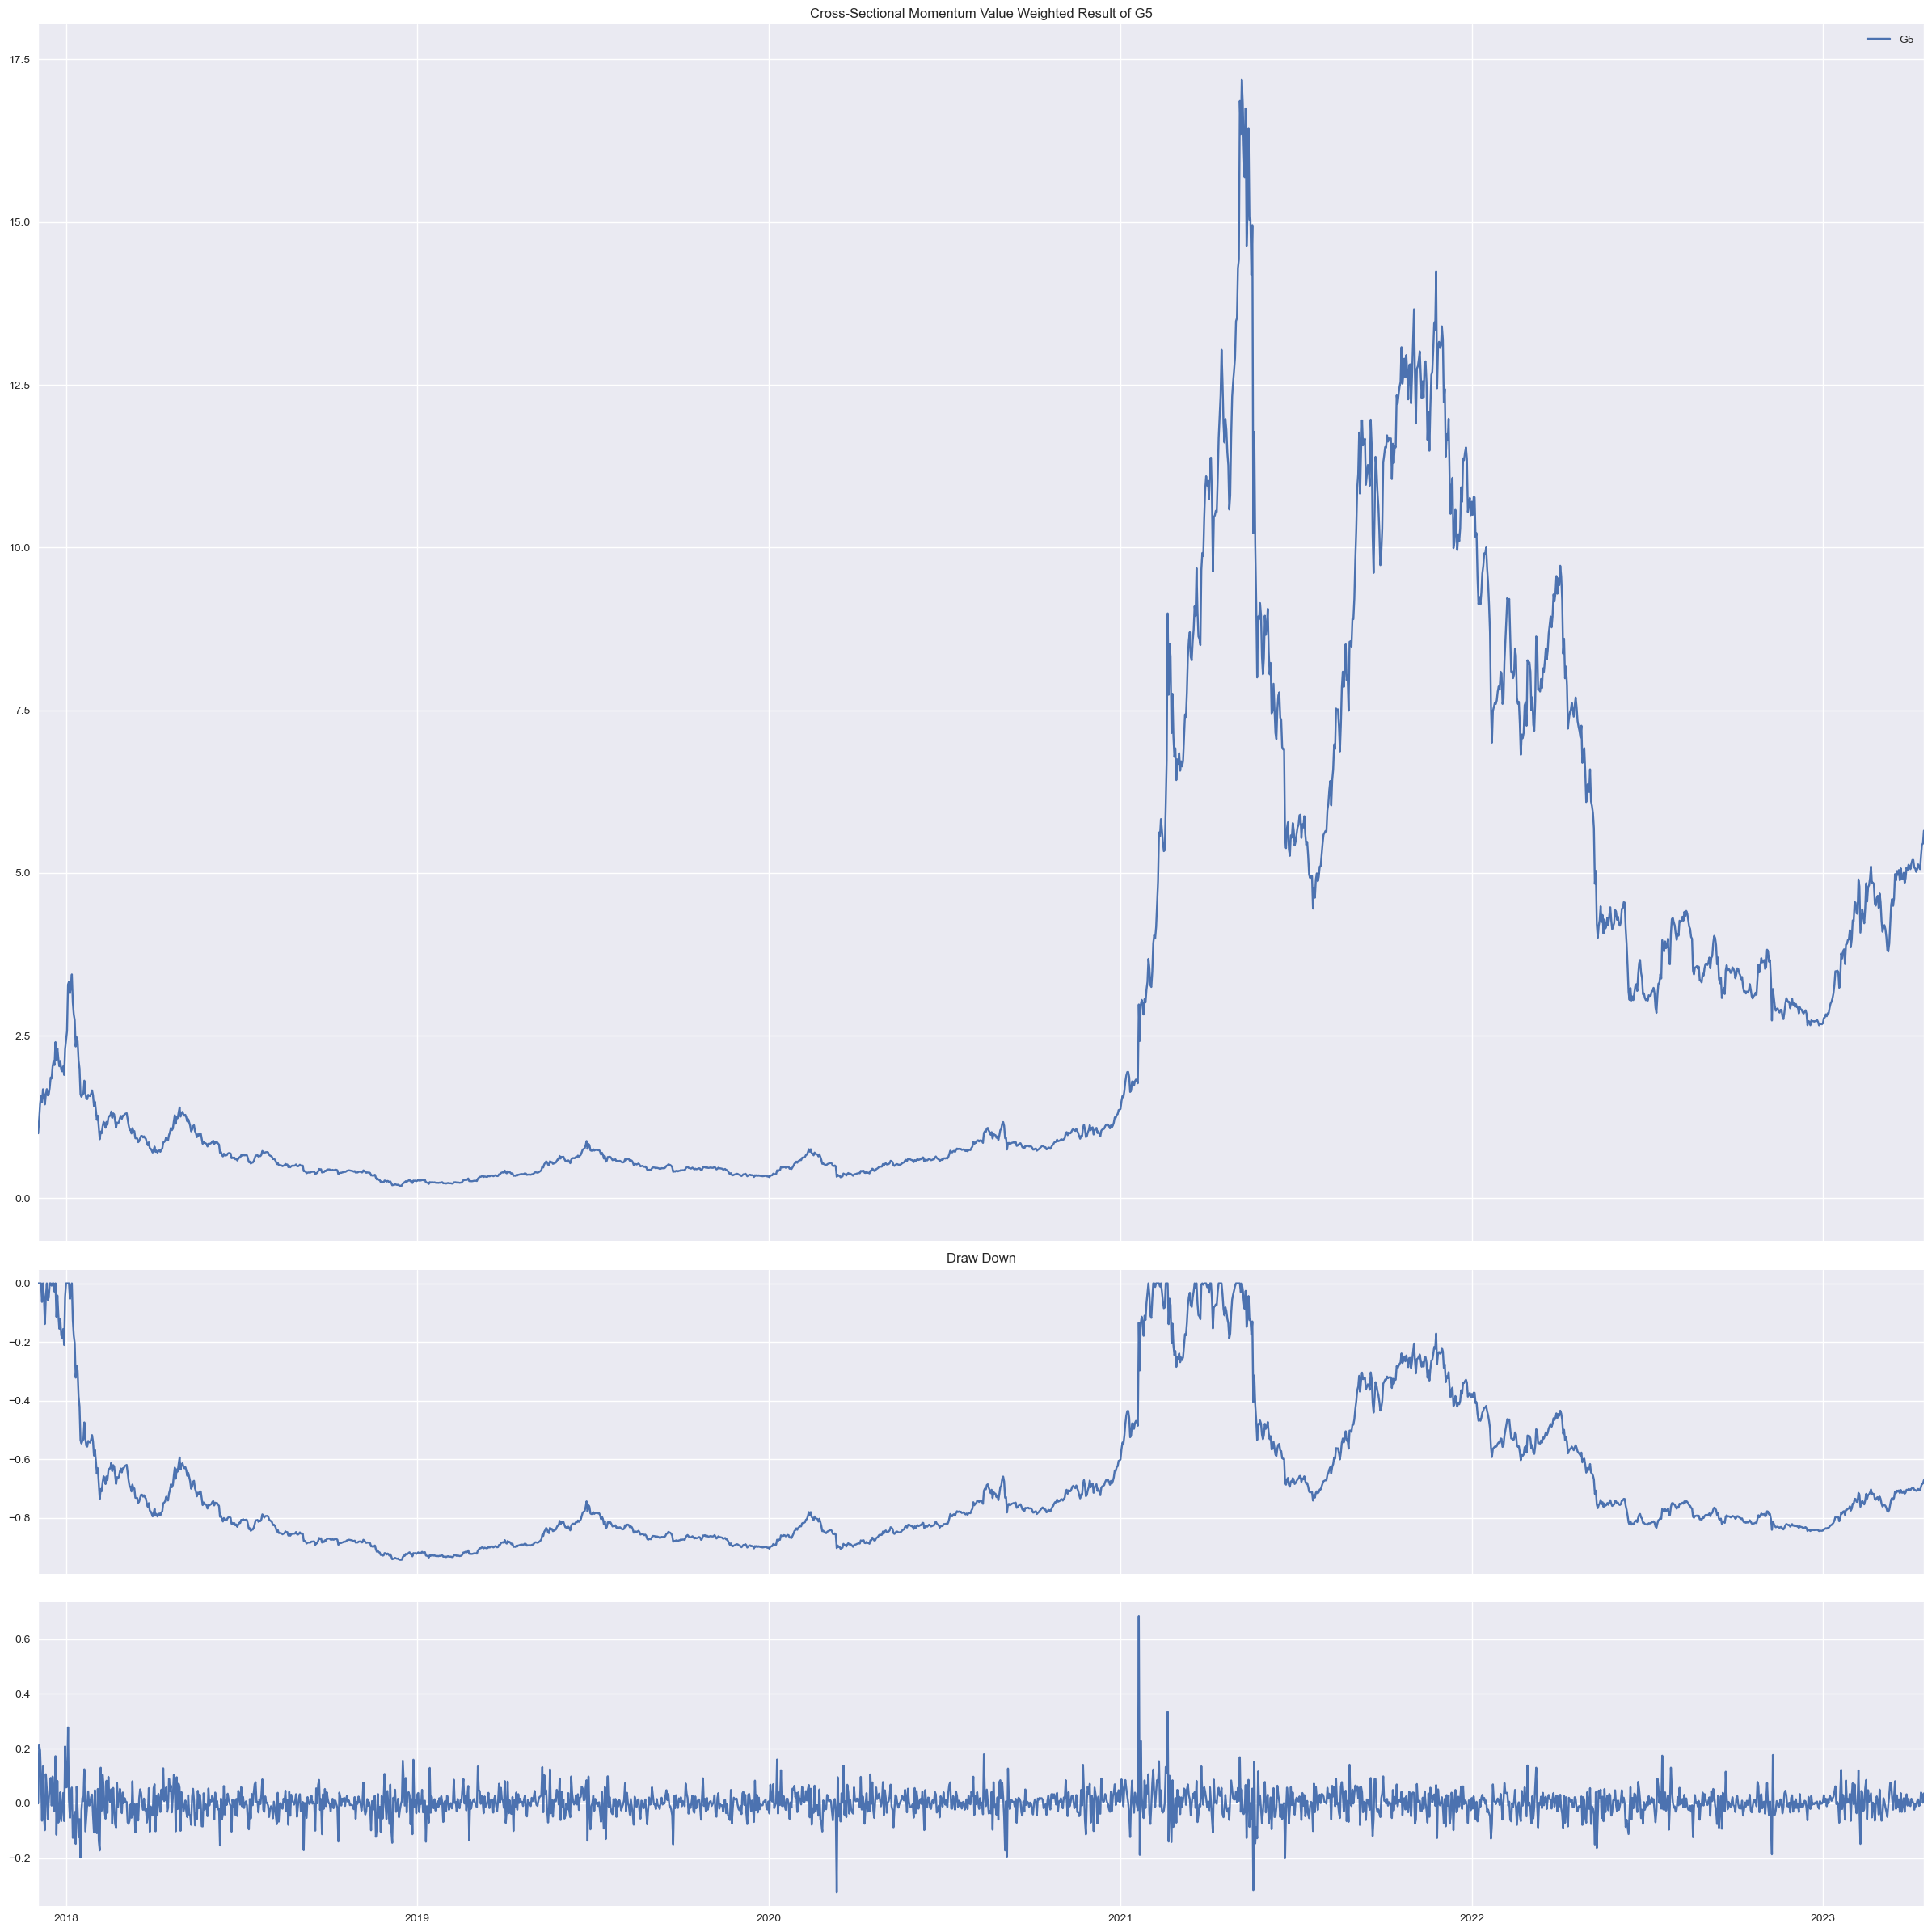

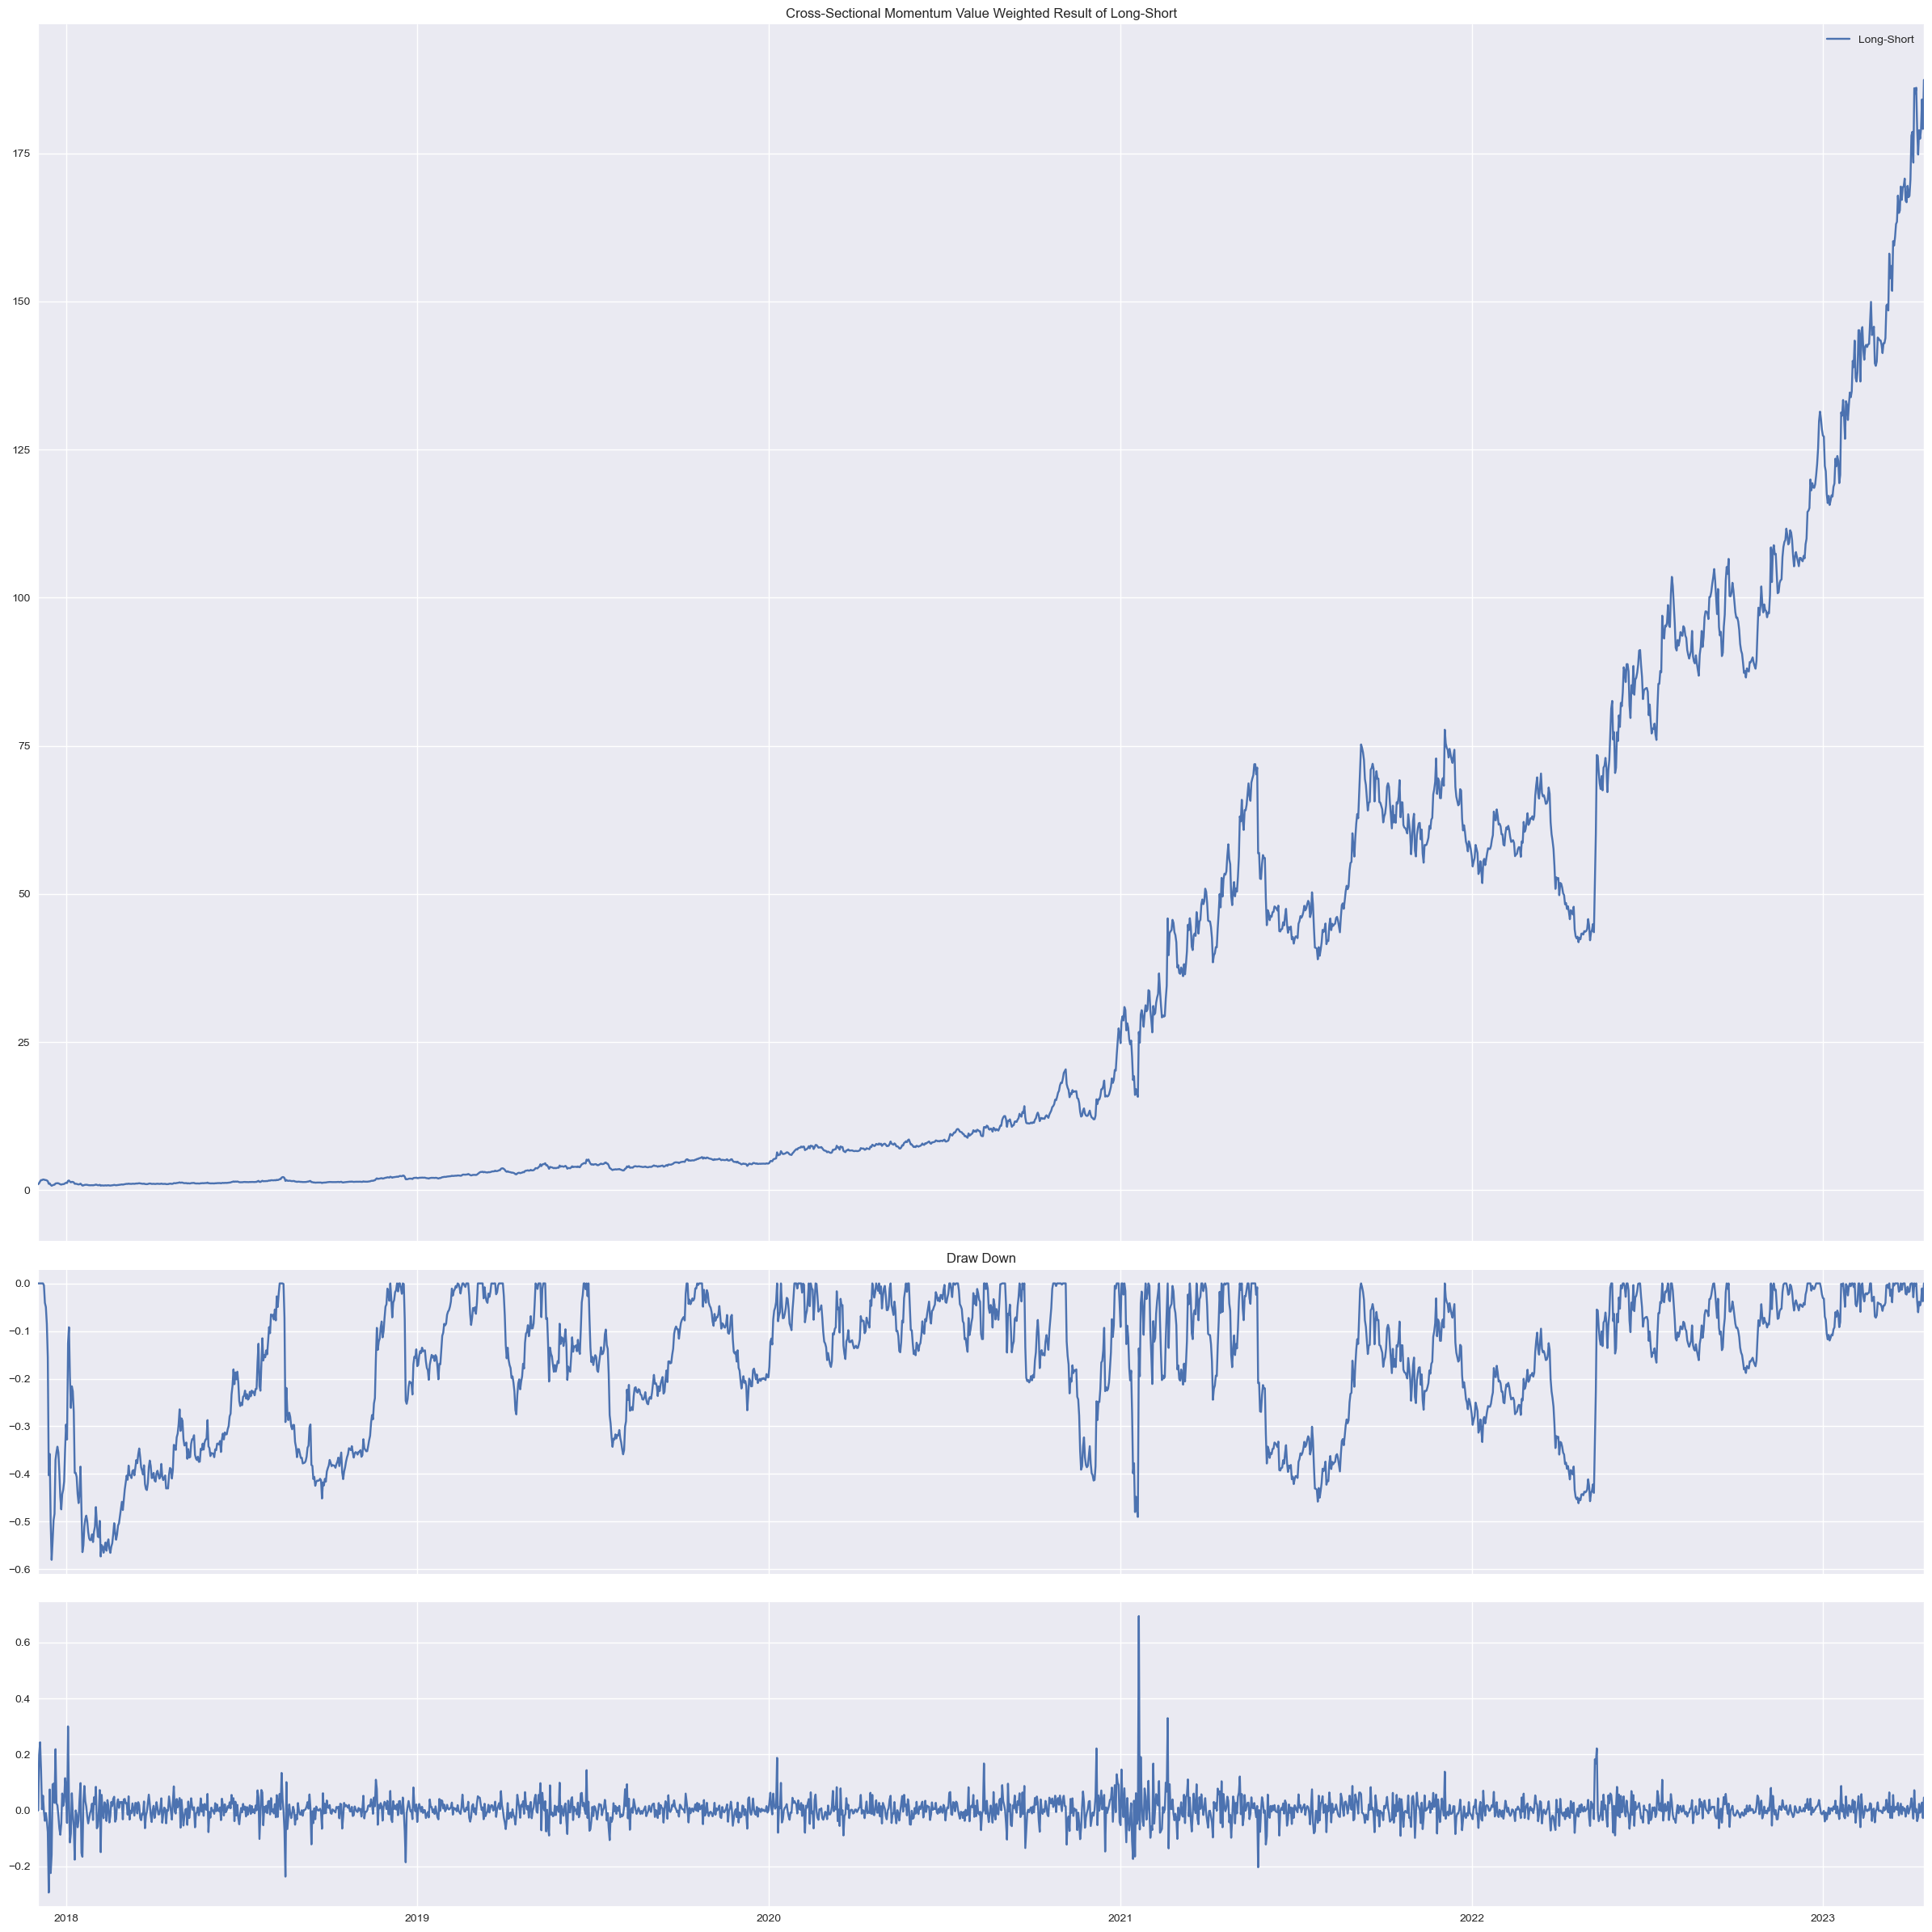

In [33]:
mytool.draw_return_result(momentum_cmktcap["M3"])

In [34]:
mytool.print_statistics(momentum_cmktcap["M3"])

0         1         2         3         4         5
CAGR   -0.663700 -0.201300  0.090500  0.310600  0.331700  1.562300
Mean   -0.512140  0.275550  0.484790  0.716730  0.812990  1.325140
STD     1.055709  0.988523  0.863403  0.931187  0.999042  0.852954
MDD     0.999000  0.968000  0.939000  0.930000  0.943000  0.580000
Sharpe -0.485115  0.278749  0.561488  0.769695  0.813770  1.553590

In [ ]:
# 코인 마켓켑 축소
momentum_cmktcap_reduced = {}
momentum_num_cmktcap_reduced = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt_reduced.weekly_momentum_value_weighted(4,"SUN", 15, value_lst[0],value_lst[1])
    momentum_cmktcap_reduced[key] = rtn
    momentum_num_cmktcap_reduced[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(momentum_cmktcap_reduced["M3"])

In [ ]:
mytool.print_statistics(momentum_cmktcap_reduced["M3"])

In [ ]:
# 바이낸스
momentum_binance = {}
momentum_num_binance = {}

for key, value_lst in group_value.items():
    rtn, num = b_mkt.weekly_momentum_value_weighted(4,"SUN", 15, value_lst[0],value_lst[1])
    momentum_binance[key] = rtn
    momentum_num_binance[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(momentum_binance["M3"])

In [ ]:
mytool.print_statistics(momentum_binance["M3"])

Momentum Weighted 전략구현

In [ ]:
momentum_weighted_cmktcap = {}
momentum_weighted_num_cmktcap = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt.weekly_momentum_momentum_weighted(5,"SUN", 20, value_lst[0],value_lst[1])
    momentum_weighted_cmktcap[key] = rtn
    momentum_weighted_num_cmktcap[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(momentum_weighted_cmktcap["M3"])

In [ ]:
mytool.print_statistics(momentum_weighted_cmktcap["M3"])

In [ ]:
# 코인 마켓켑 
momentum_weighted_cmktcap_reduced = {}
momentum_weighted_num_cmktcap_reduced = {}

for key, value_lst in group_value.items():
    rtn, num = c_mkt_reduced.weekly_momentum_momentum_weighted(4,"SUN", 15, value_lst[0],value_lst[1])
    momentum_weighted_cmktcap_reduced[key] = rtn
    momentum_weighted_num_cmktcap_reduced[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

In [ ]:
mytool.draw_return_result(momentum_weighted_cmktcap_reduced["M3"])

In [ ]:
mytool.print_statistics(momentum_weighted_num_cmktcap_reduced["M3"])

In [35]:
# 바이낸스
momentum_weighted_binance = {}
momentum_weighted_num_binance = {}

for key, value_lst in group_value.items():
    rtn, num = b_mkt.weekly_momentum_momentum_weighted(4,"SUN", 15, value_lst[0],value_lst[1])
    momentum_weighted_binance[key] = rtn
    momentum_weighted_num_binance[key] = num  # 딕셔너리의 딕셔너리가 들어있겠군

100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


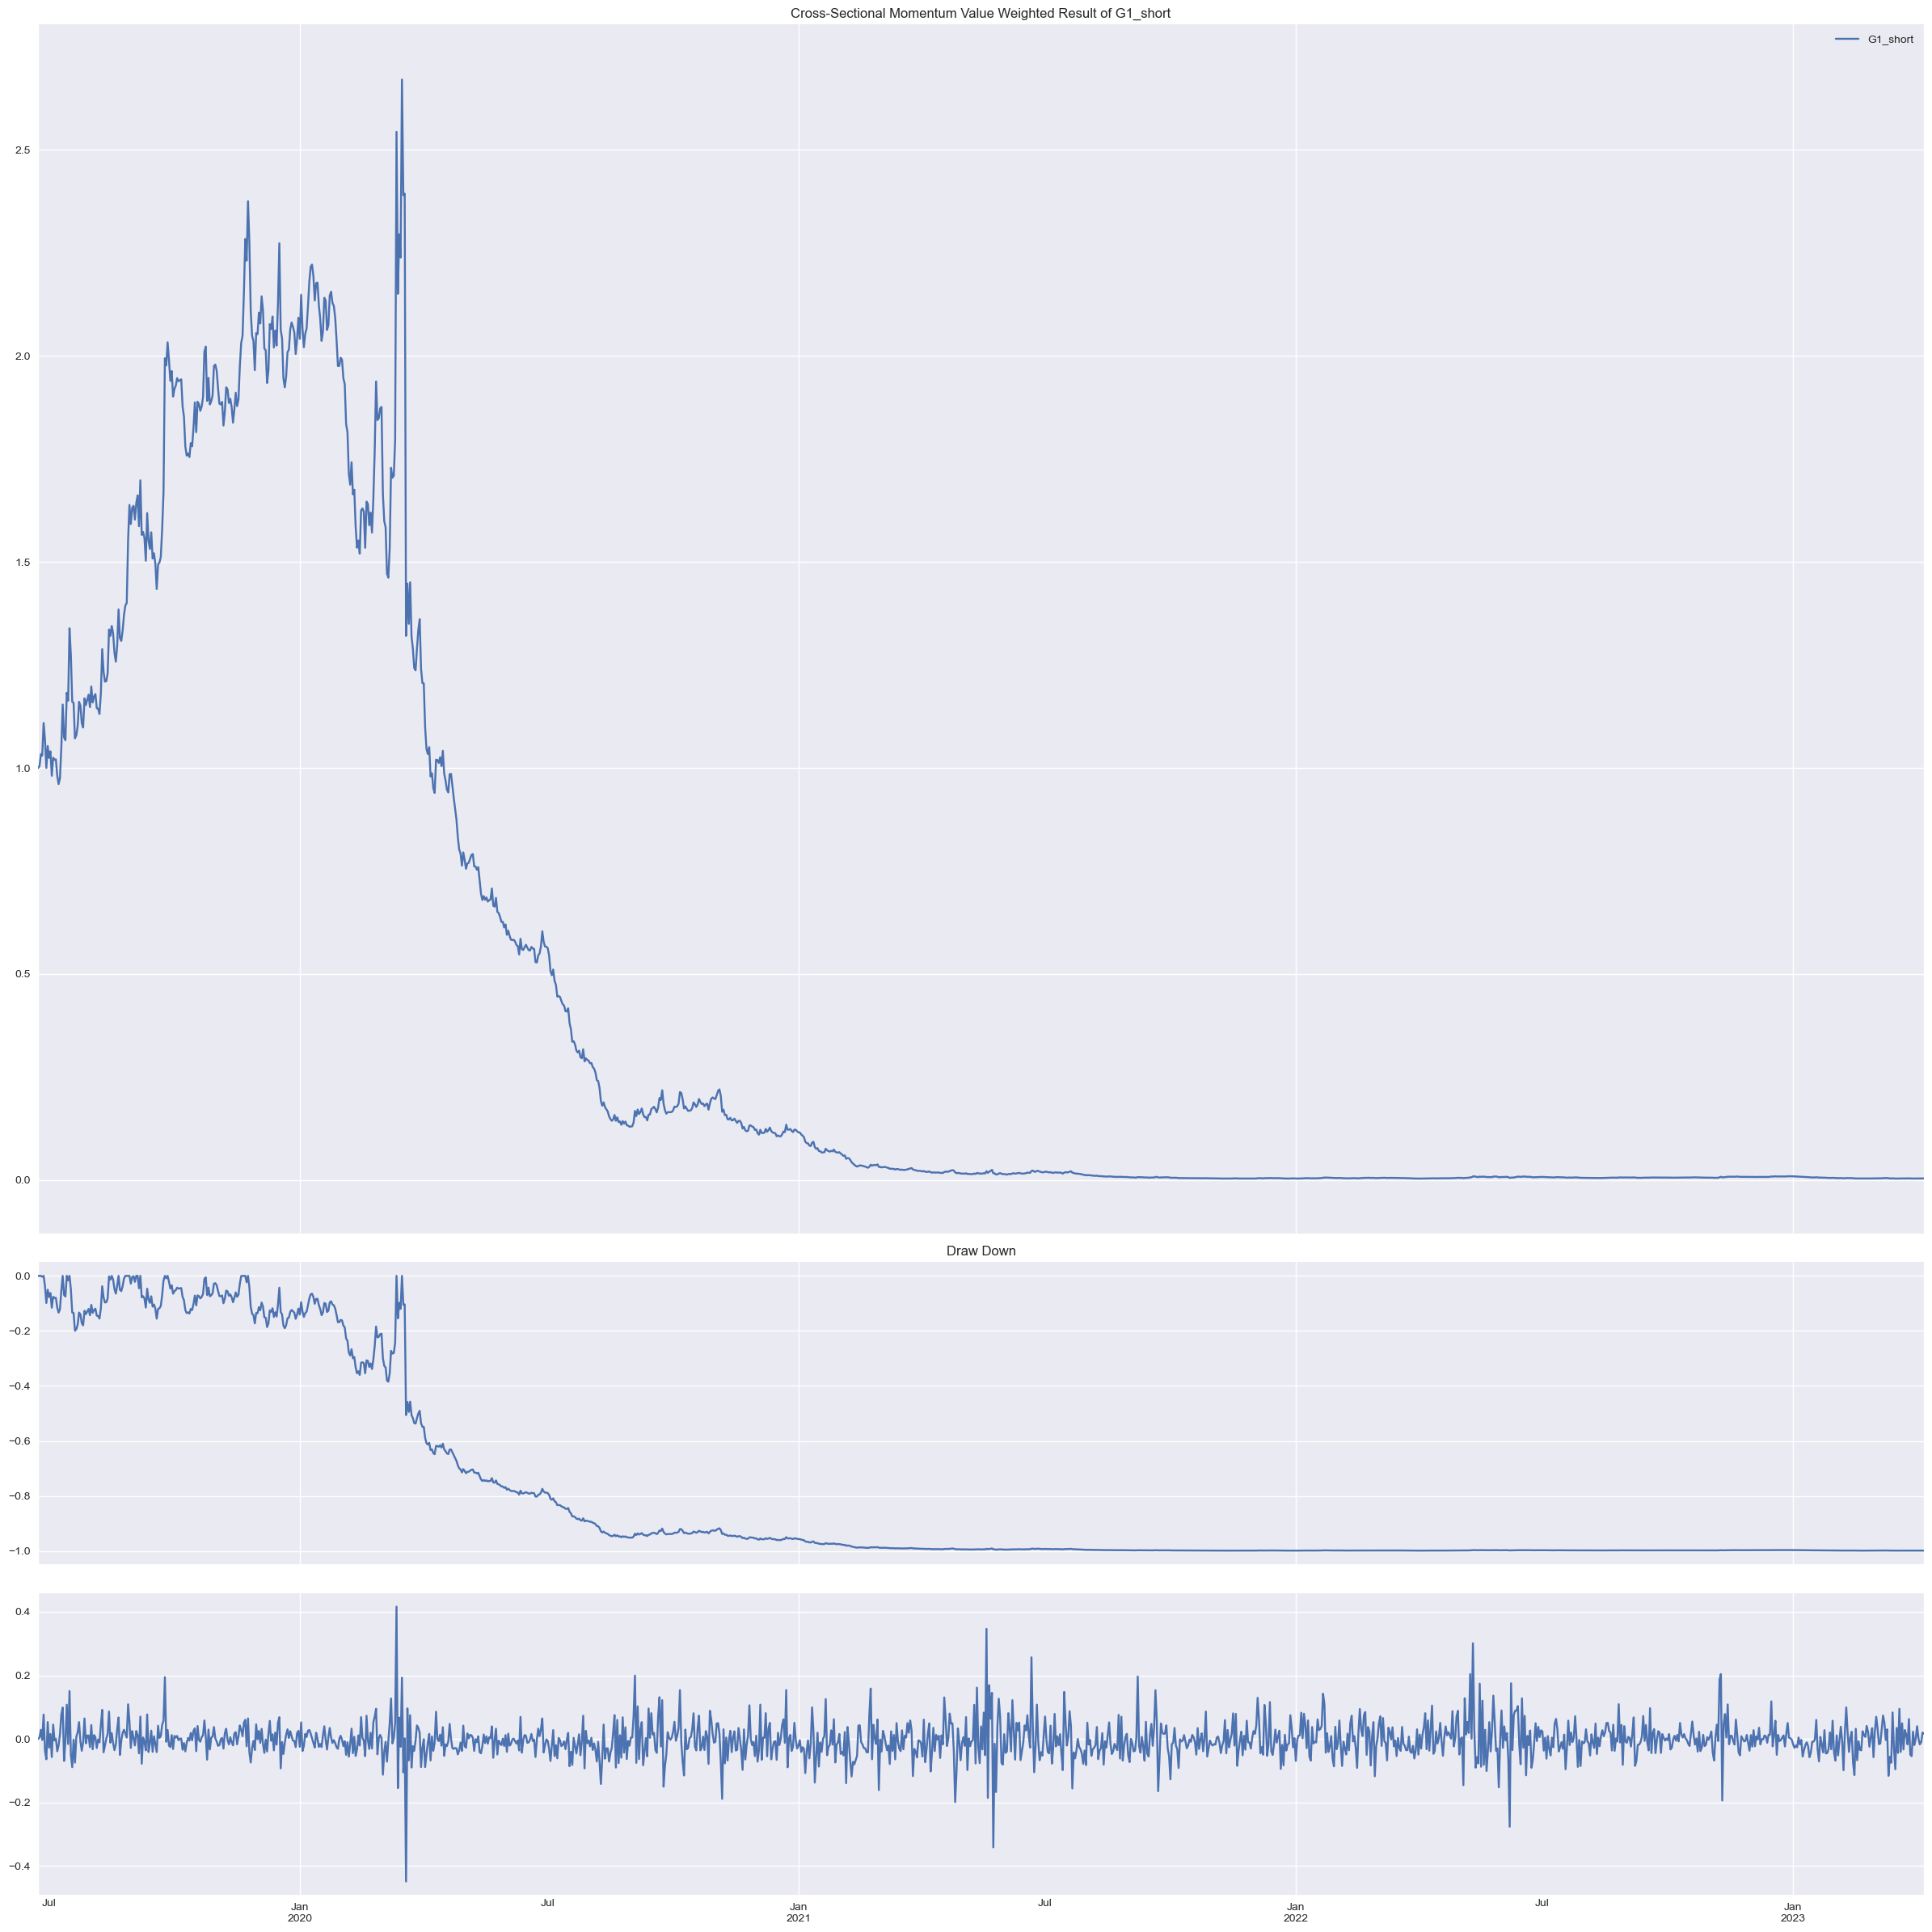

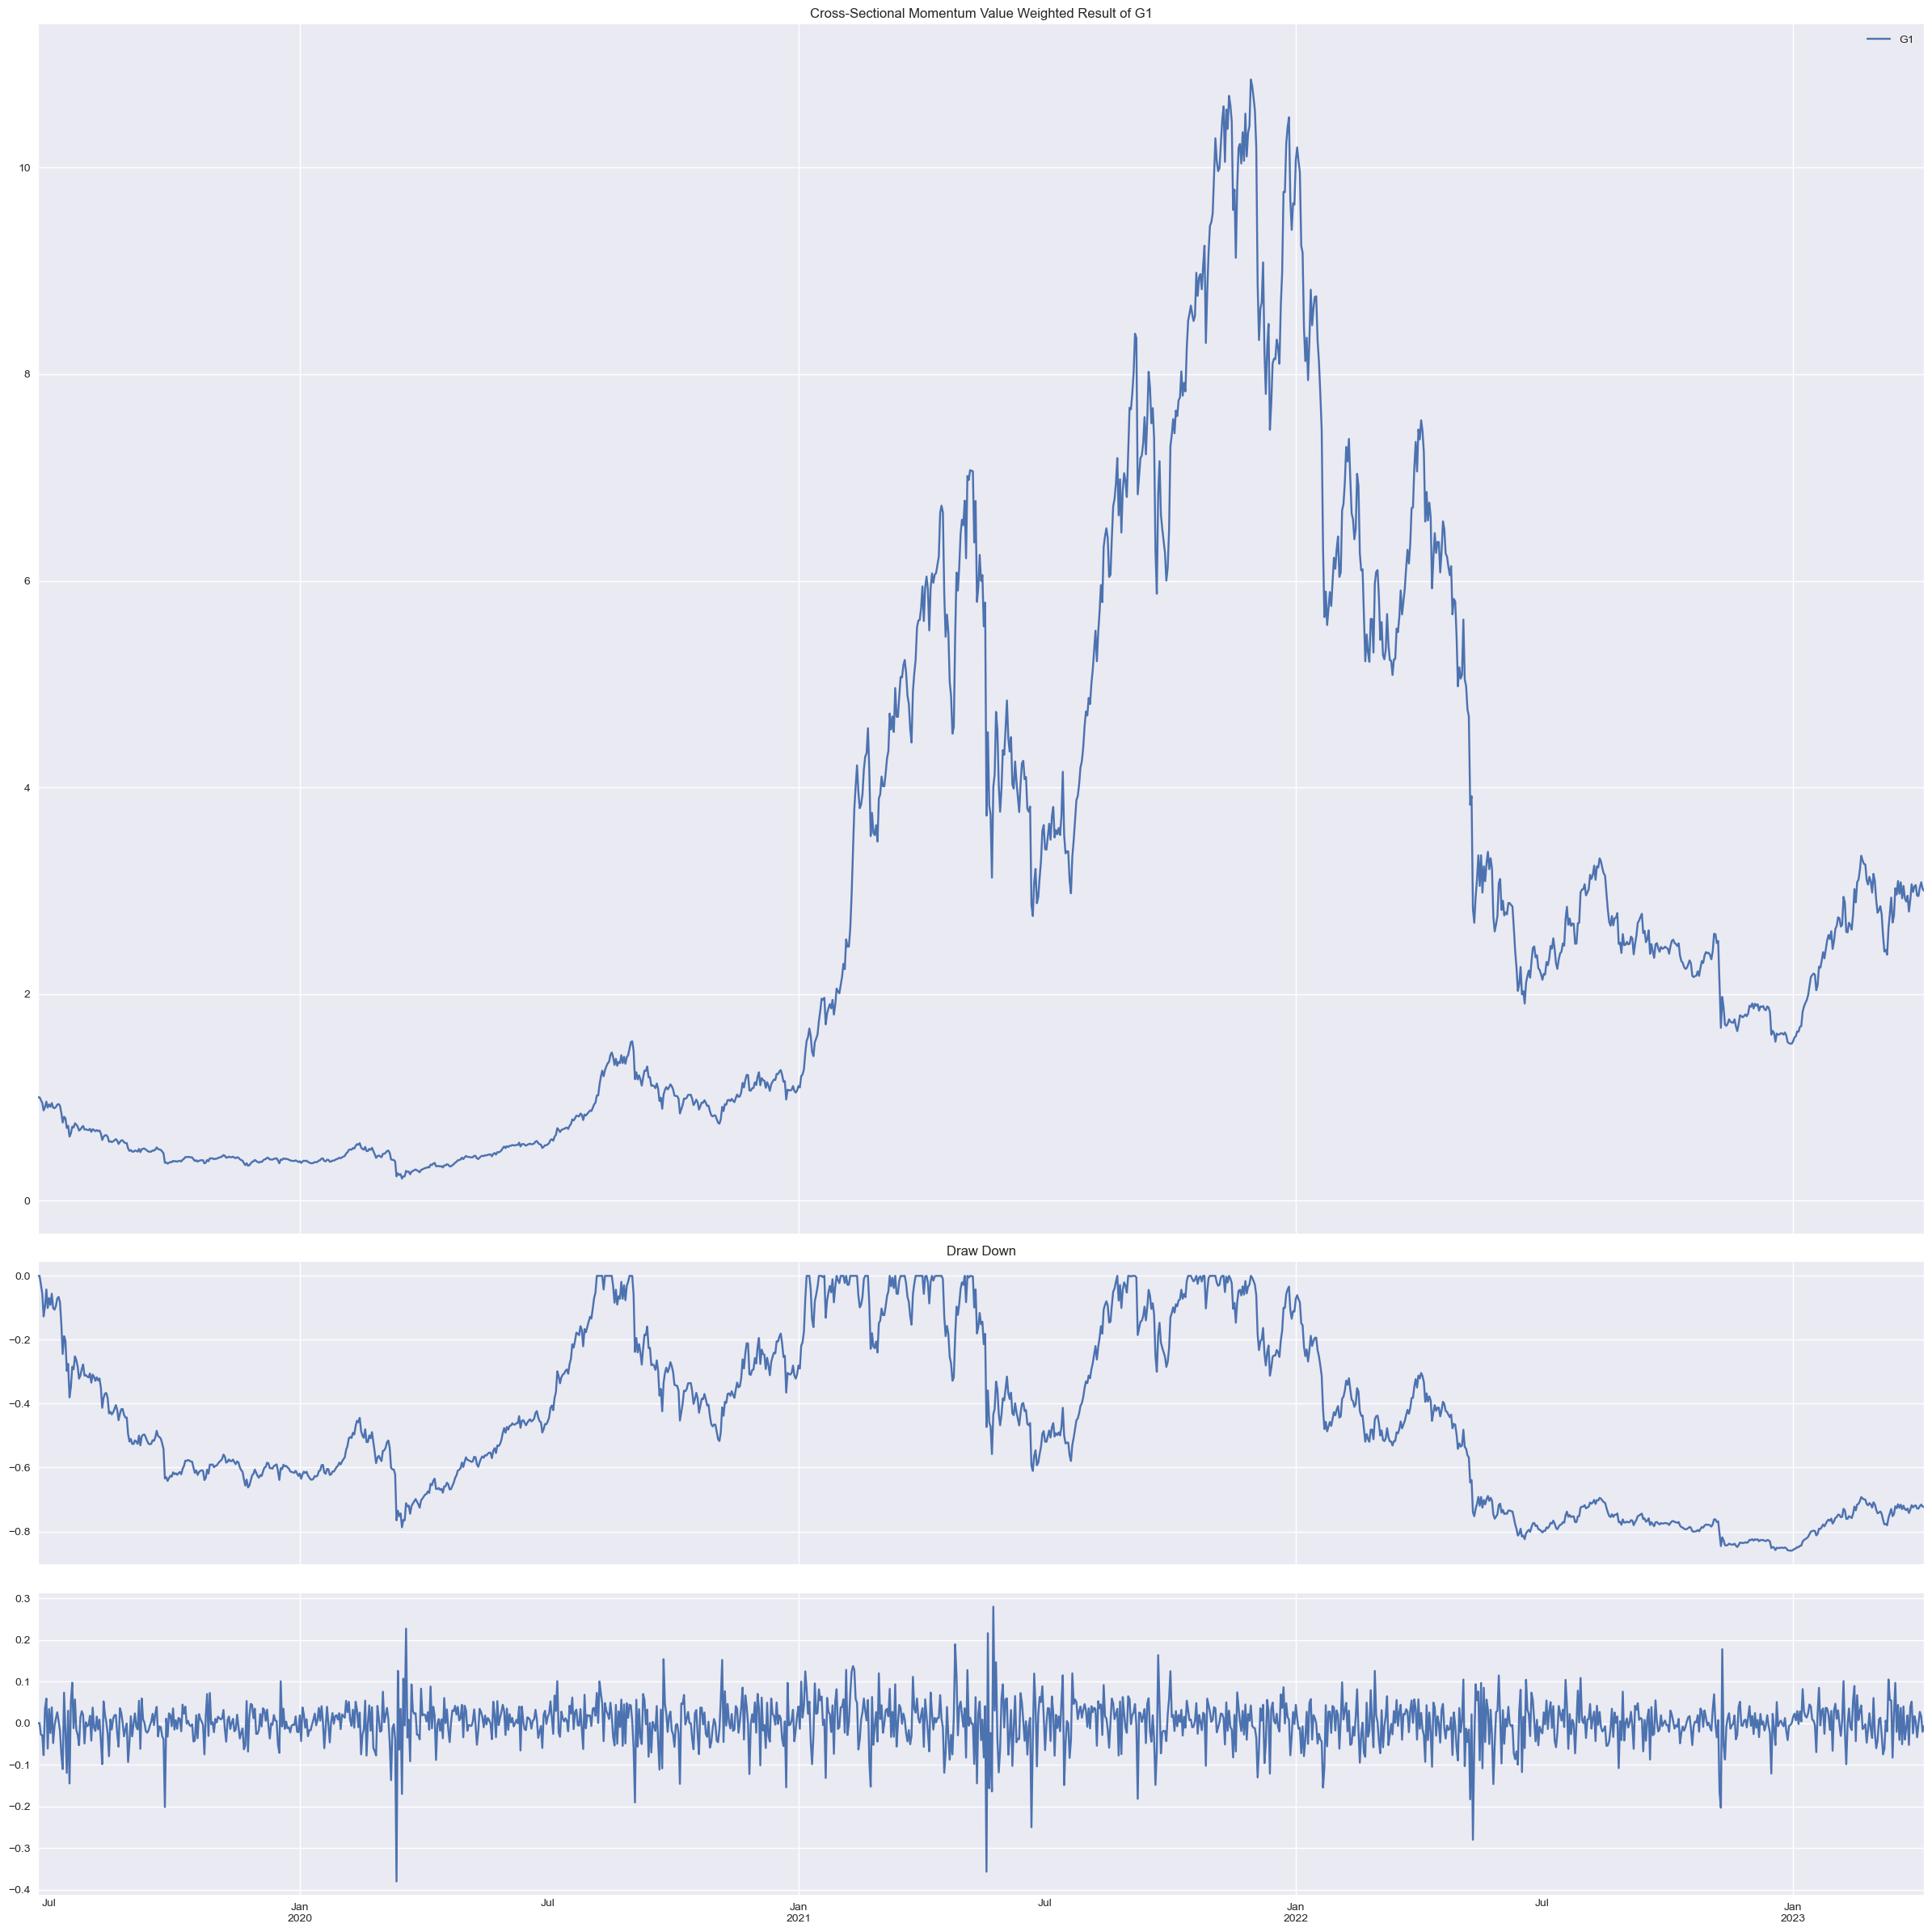

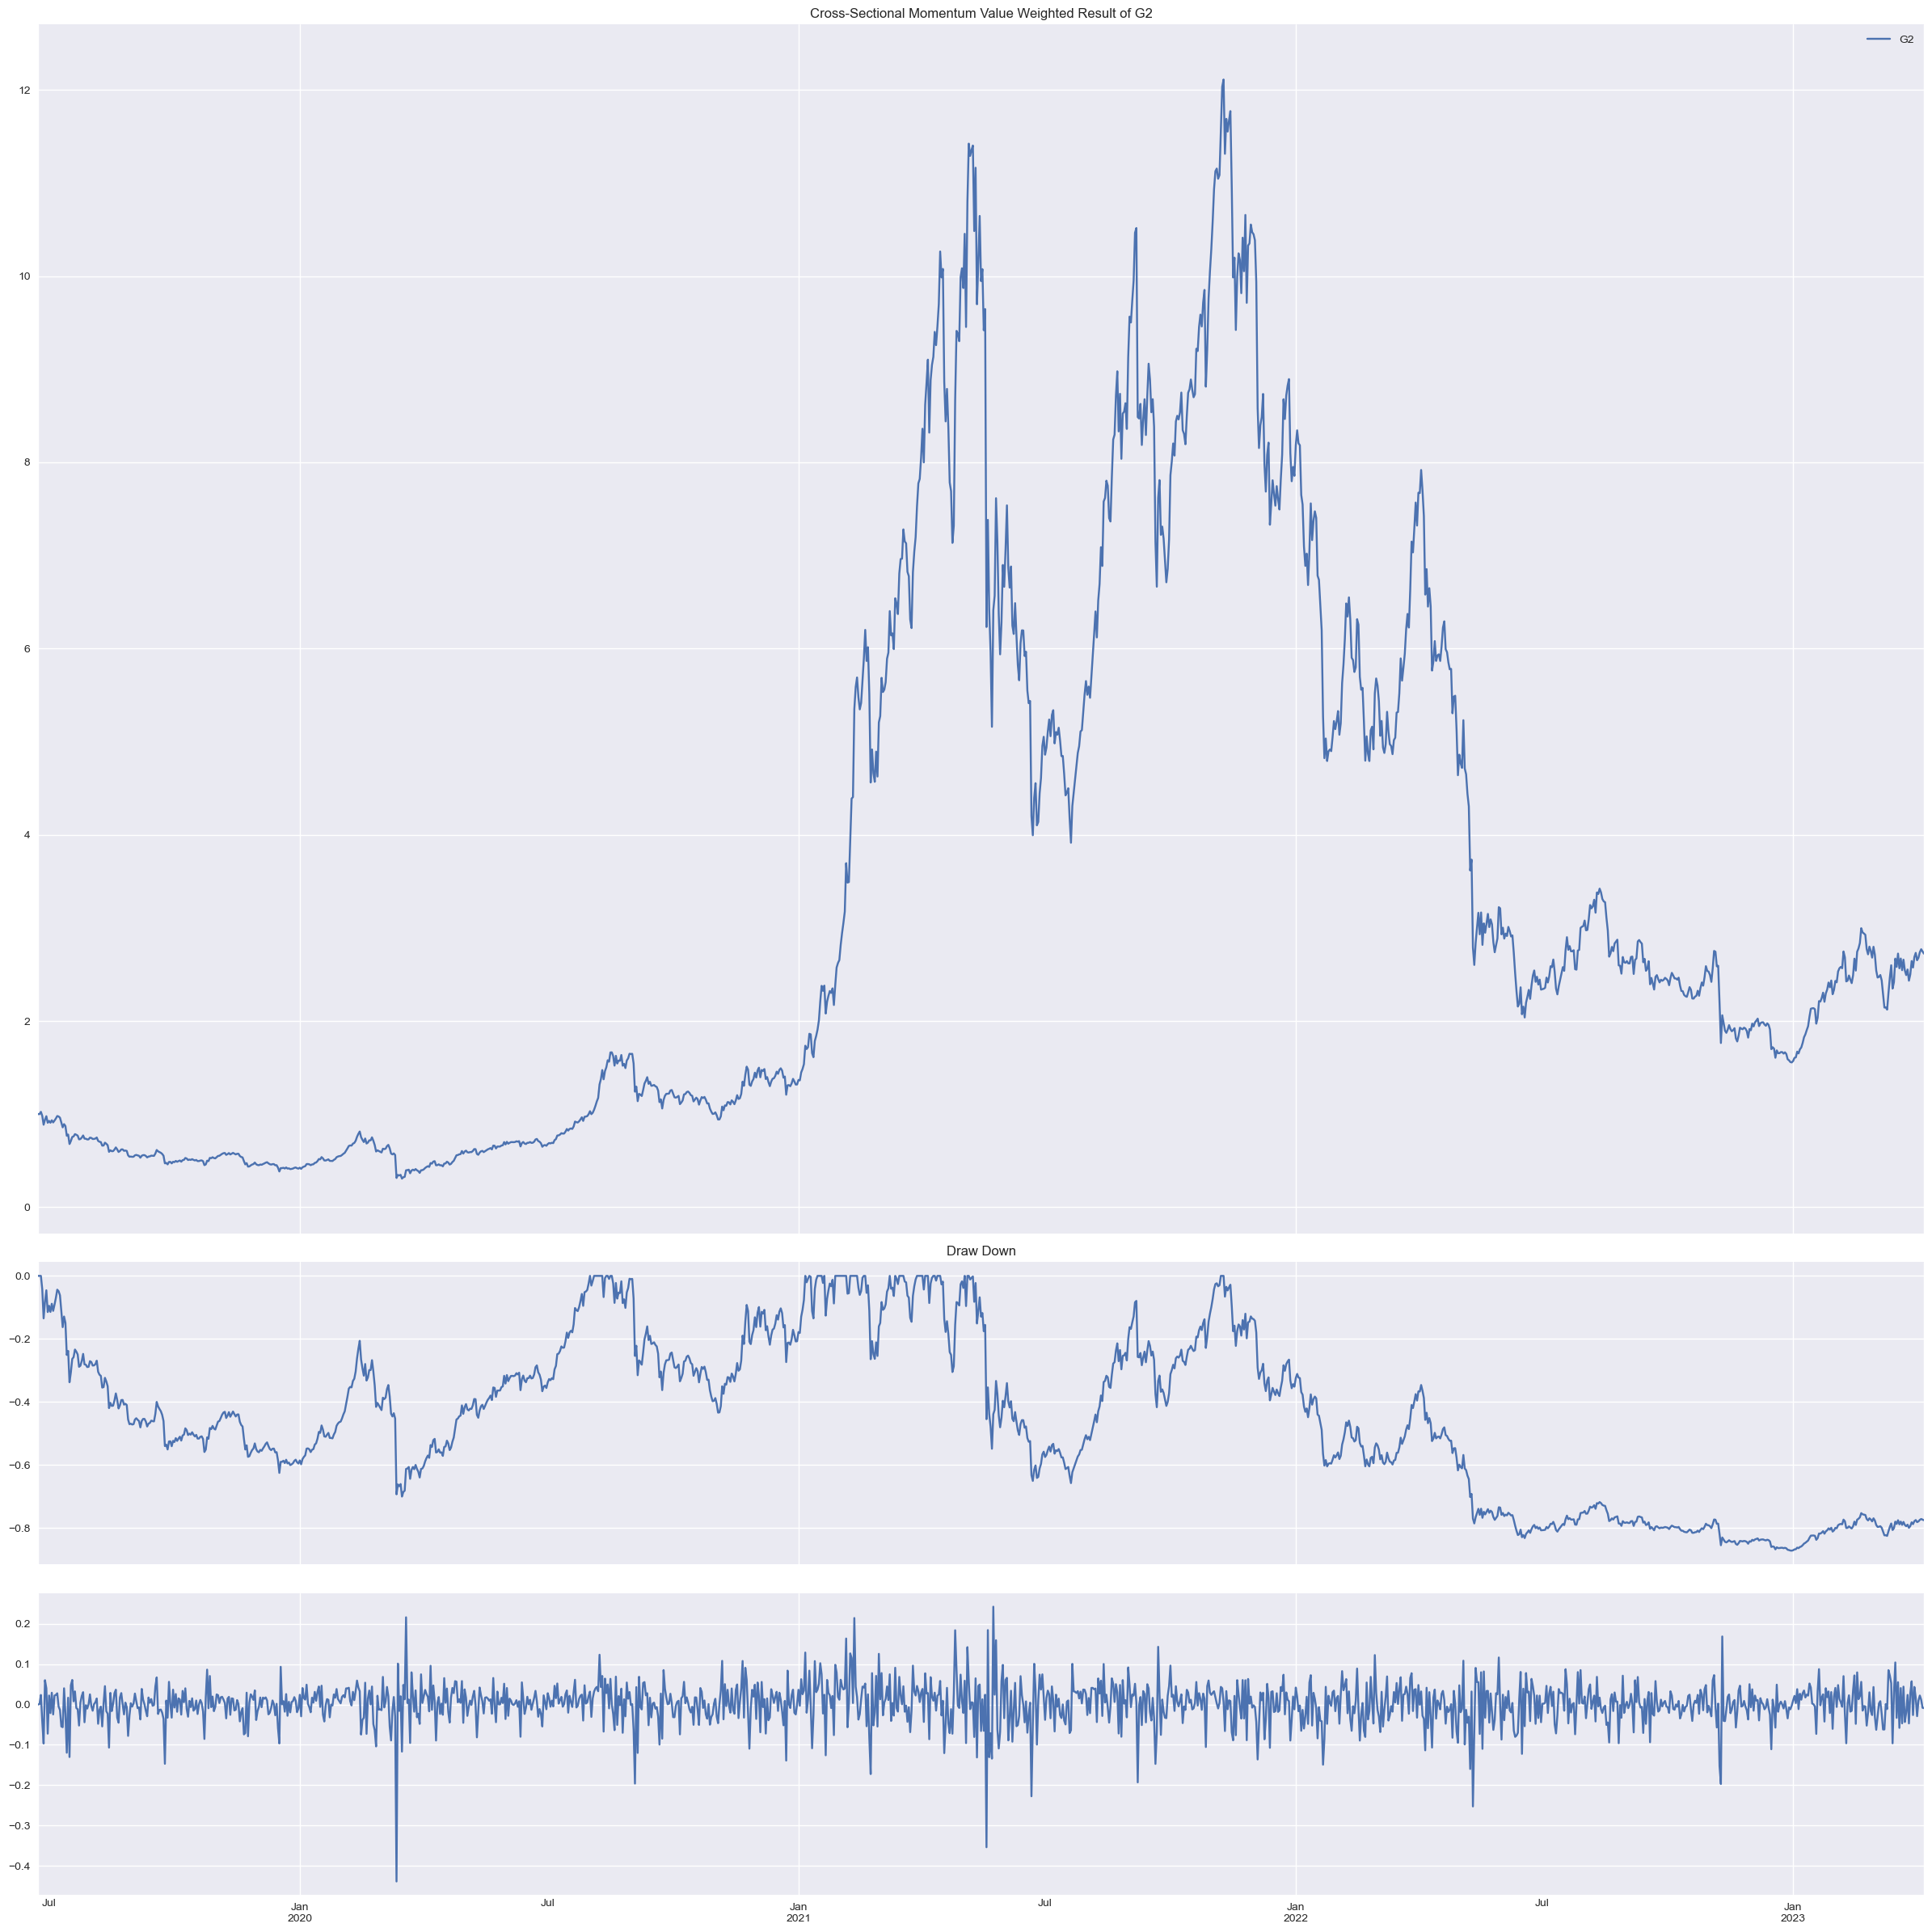

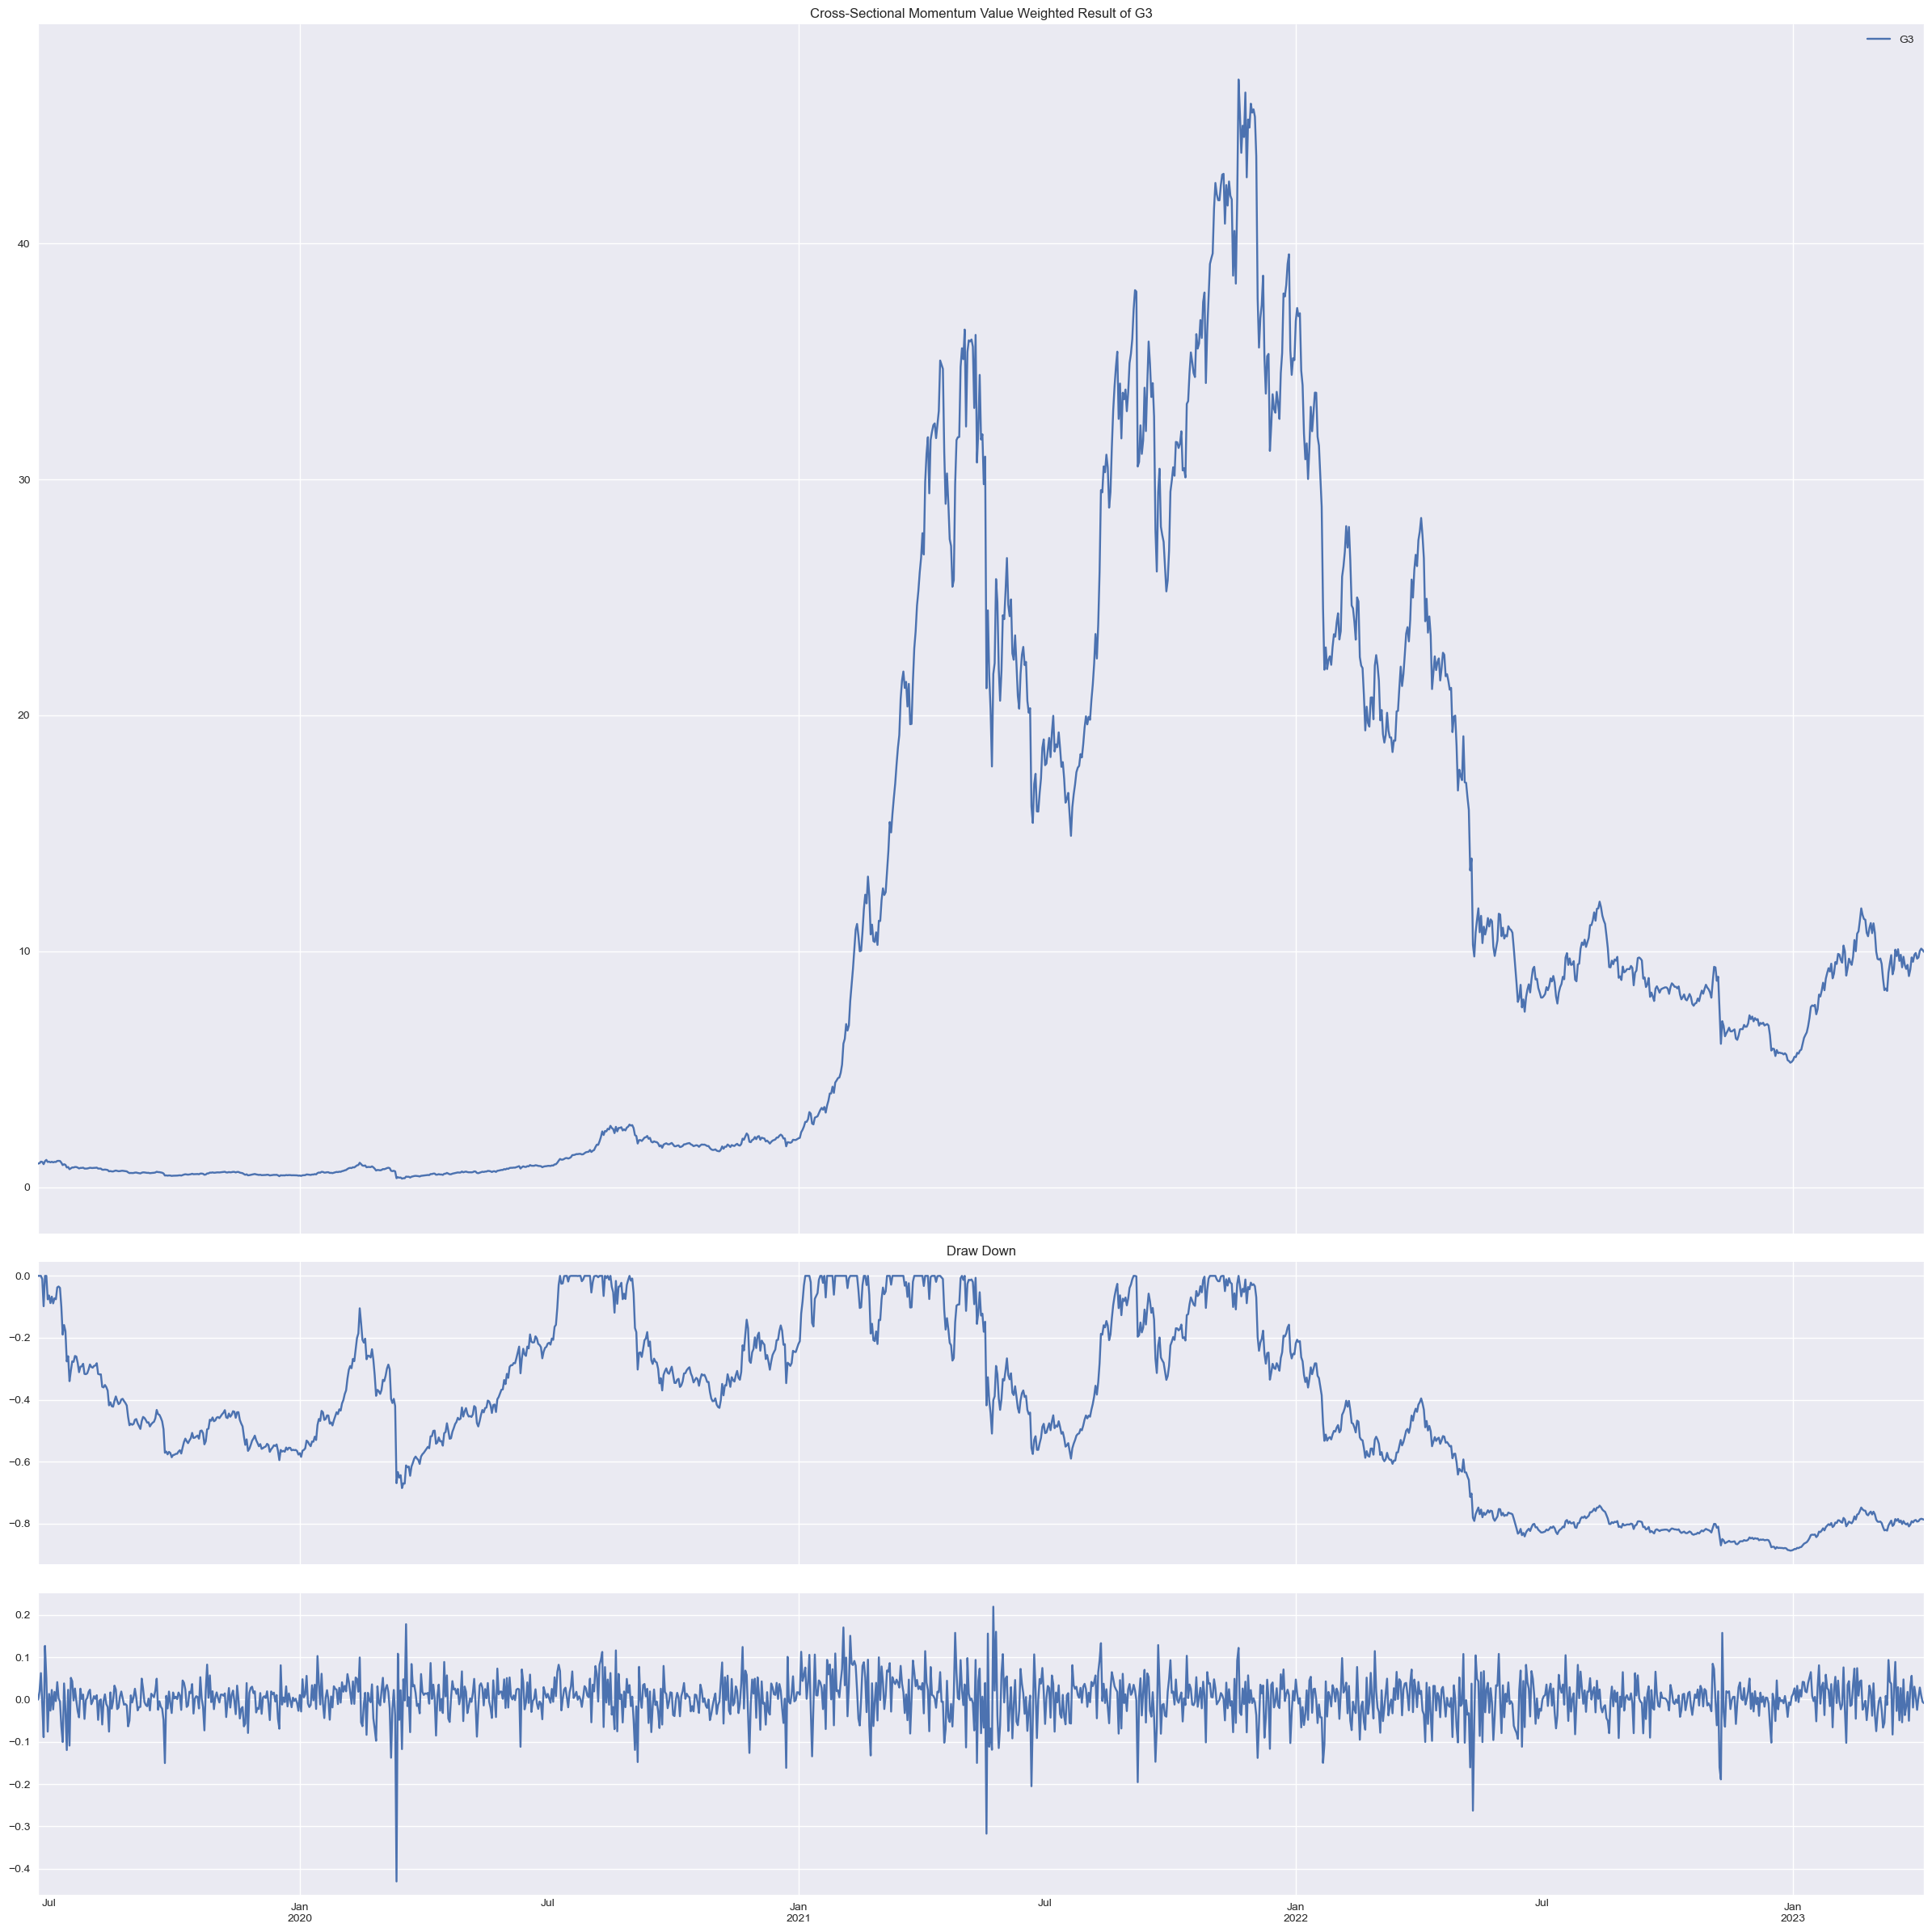

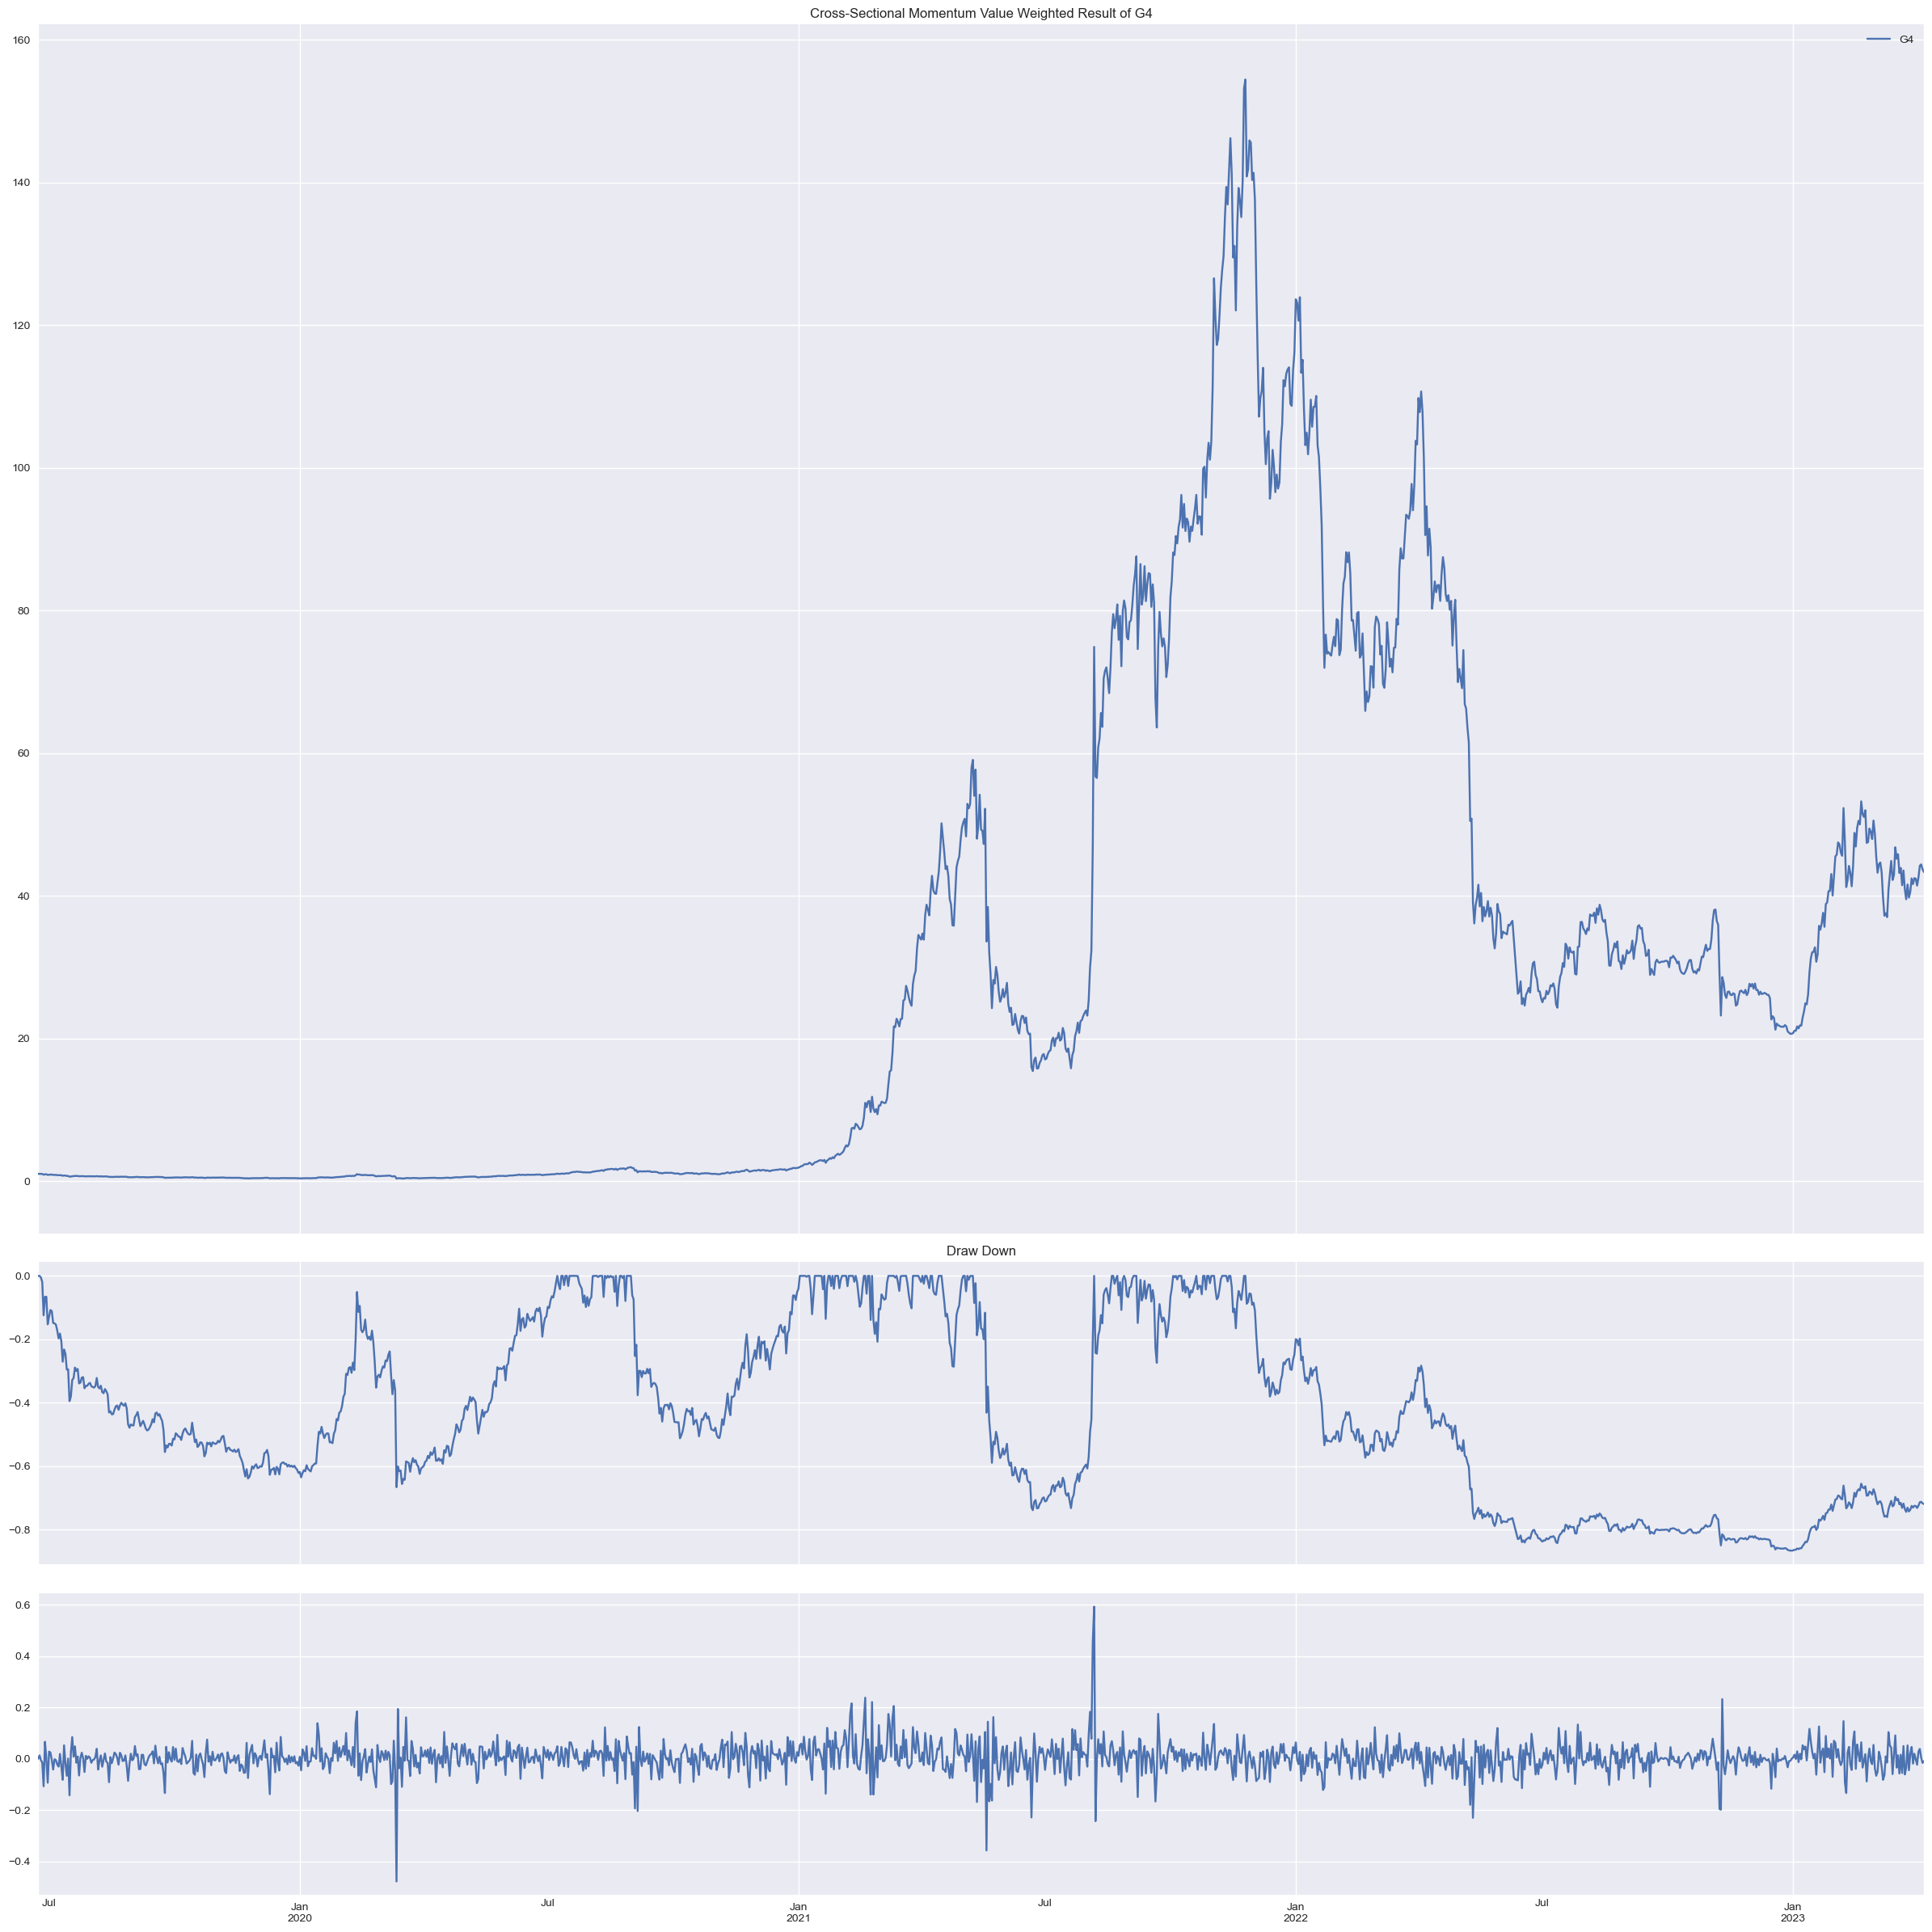

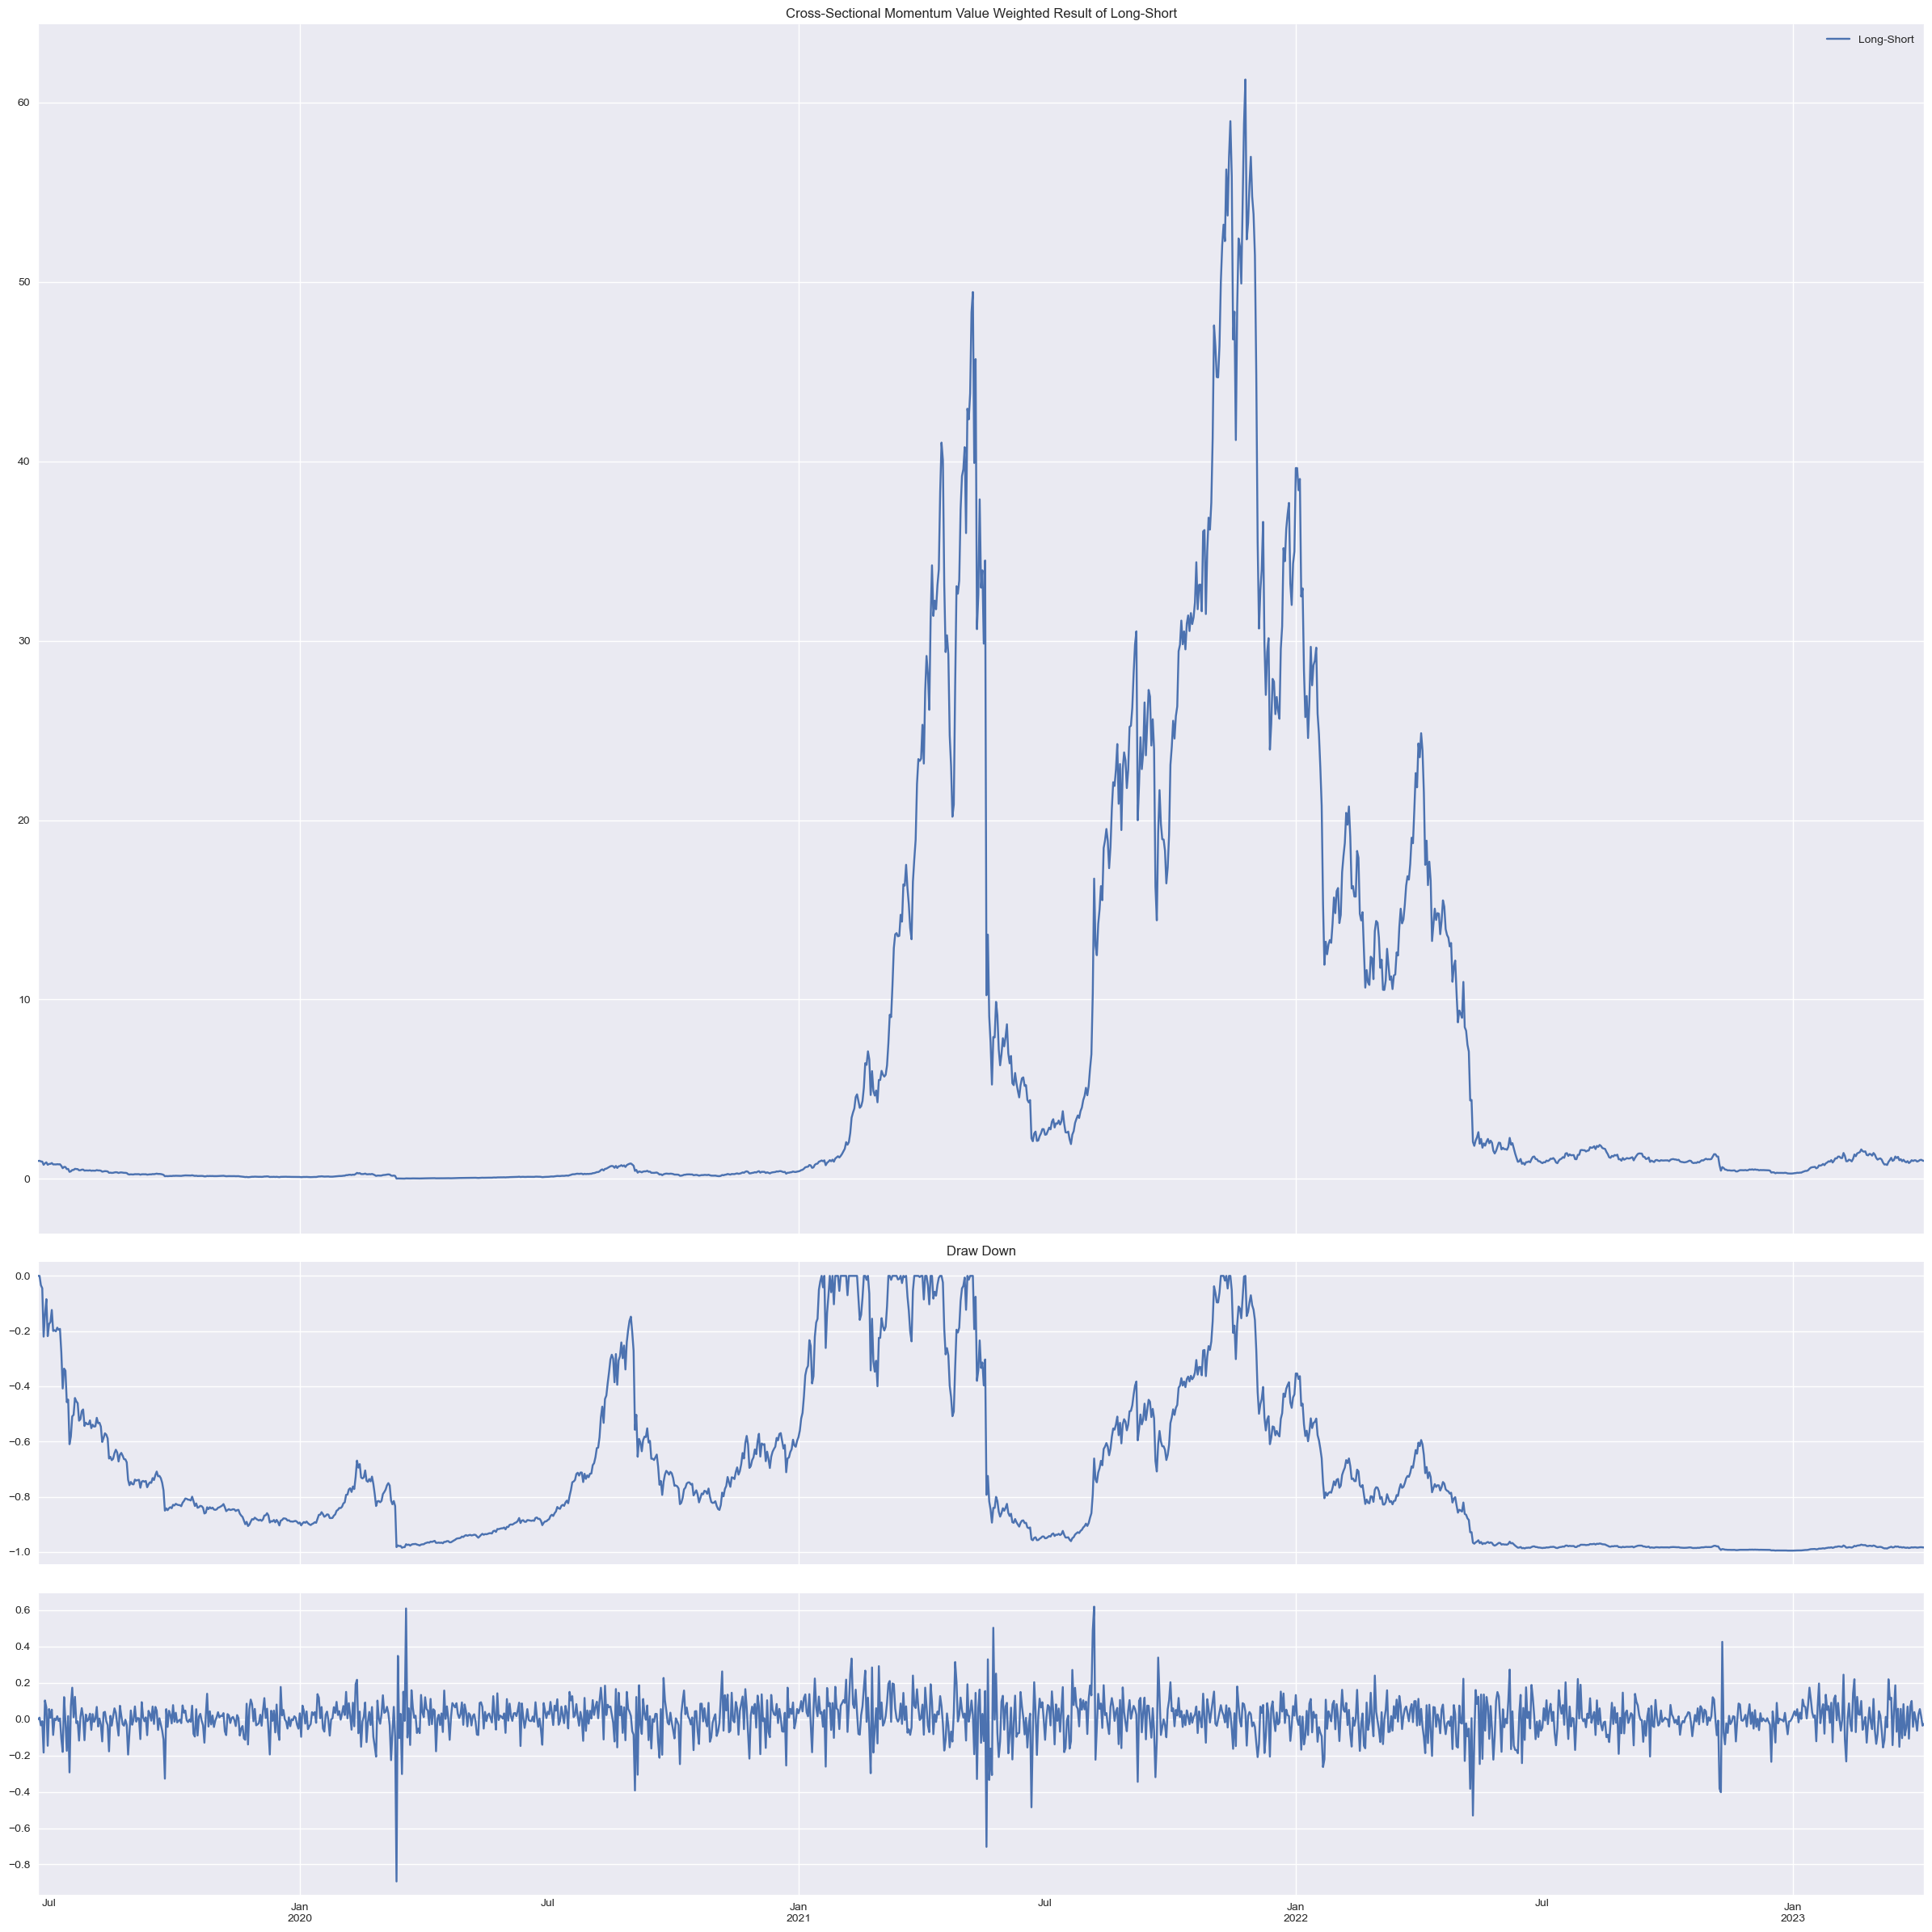

In [36]:
mytool.draw_return_result(momentum_weighted_binance["M3"])

In [46]:
mytool.print_statistics(momentum_weighted_binance["M4"])

0         1         2         3         4         5
CAGR   -0.700600  0.123100  0.337200  0.302300  1.105500 -0.424200
Mean   -0.556450  0.682200  0.818380  0.753000  1.352770  1.909220
STD     1.136376  1.047891  1.019181  0.993677  1.089839  2.114665
MDD     0.979000  0.867000  0.878000  0.889000  0.881000  0.998000
Sharpe -0.489671  0.651022  0.802978  0.757791  1.241257  0.902848